# Data Cleaning

In [1]:
import pandas as pd

file_path = '../data/raw/litigation_cases.xlsx'
df = pd.read_excel(file_path, header=5)
df = df.iloc[:-7]

In [2]:
df.head(10)

LIT Leave Decision Date - Year    Country of Citizenship  \
0                           2023                     India   
1                           2021                      Fiji   
2                           2023                    Russia   
3                           2023     Republic of Indonesia   
4                           2018                   Georgia   
5                           2019                   Nigeria   
6                           2020  United States of America   
7                           2018                   Lebanon   
8                           2022                     India   
9                           2021                   Croatia   

             LIT Leave Decision Desc LIT Case Type Group Desc  \
0                 Dismissed at Leave            RAD Decisions   
1                            Allowed            IAD Decisions   
2  Discontinued - Withdrawn at Leave     Visa Officer Refusal   
3    Discontinued - Consent at Leave             HC Decisions   
4    Discontinued - Consent at Leave     Visa Officer Refusal   
5                 Dismissed at Leave                     PRRA   
6                            Allowed            RAD Decisions   
7                 Dismissed at Leave            RAD Decisions   
8  Discontinued - Withdrawn at Leave            Removal Order   
9                            Allowed             HC Decisions   

              LIT Case Type Desc LIT Filed By Desc LIT Tribunal Type Desc  \
0   RAD-Dismissed-Confirmed-Same  Person Concerned          Federal Court   
1              IAD-Removal Order  Person Concerned          Federal Court   
2          Visa Officer Decision  Person Concerned          Federal Court   
3            HC Refusal-Perm Res  Person Concerned          Federal Court   
4          Visa Officer Decision  Person Concerned          Federal Court   
5              PRRA-Not Eligible  Person Concerned          Federal Court   
6   RAD-Dismissed-Confirmed-Same  Person Concerned          Federal Court   
7  RAD-Dismissed-Confirmed-Other  Person Concerned          Federal Court   
8  Minister-Other / Other Admin.  Person Concerned          Federal Court   
9            HC Refusal-Perm Res  Person Concerned          Federal Court   

  LIT Primary Office Type Desc  \
0                       Inland   
1                Port of Entry   
2        International Network   
3                       Inland   
4        International Network   
5                       Inland   
6                       Inland   
7                       Inland   
8        International Network   
9                       Inland   

             LIT Primary Office Regional Group Desc  LIT Litigation Count  
0                                IRCC Vancouver Adm                  12.0  
1                          Pacific Highway District                   1.0  
2                                       Unspecified                   7.0  
3     Humanitarian Migration and Integrity Division                   2.0  
4                                       Unspecified                   2.0  
5     Humanitarian Migration and Integrity Division                   1.0  
6  Enforcement and Intelligence Operations Division                   5.0  
7                                 Ontario West Area                   2.0  
8                                       Unspecified                   3.0  
9     Humanitarian Migration and Integrity Division                   2.0

# EDA

Getting a general idea of the data

### 1. Missing Value Check
   - The dataset does not contain any missing values across all columns, which ensure the data integrity for further analysis.

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values


LIT Leave Decision Date - Year            0
Country of Citizenship                    0
LIT Leave Decision Desc                   0
LIT Case Type Group Desc                  0
LIT Case Type Desc                        0
LIT Filed By Desc                         0
LIT Tribunal Type Desc                    0
LIT Primary Office Type Desc              0
LIT Primary Office Regional Group Desc    0
LIT Litigation Count                      0
dtype: int64

### 2. Data Types and Features
- The dataset contains 8 categorical columns and 1 numeric column, and the specific columns are listed below.
- Since the count of litigations should always be a whole number, the LIT Litigation Count column should be converted to an integer type from float64.

In [4]:
# Basic overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13781 entries, 0 to 13780
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LIT Leave Decision Date - Year          13781 non-null  object 
 1   Country of Citizenship                  13781 non-null  object 
 2   LIT Leave Decision Desc                 13781 non-null  object 
 3   LIT Case Type Group Desc                13781 non-null  object 
 4   LIT Case Type Desc                      13781 non-null  object 
 5   LIT Filed By Desc                       13781 non-null  object 
 6   LIT Tribunal Type Desc                  13781 non-null  object 
 7   LIT Primary Office Type Desc            13781 non-null  object 
 8   LIT Primary Office Regional Group Desc  13781 non-null  object 
 9   LIT Litigation Count                    13781 non-null  float64
dtypes: float64(1), object(9)
memory usage: 1.1+ MB
None


In [5]:
# converting LIT Litigation Count to integer 
df['LIT Litigation Count'] = df['LIT Litigation Count'].astype(int)

### 2.1 For Categorical Features
- The table below shows the number of unique values for each categorical feature.
- For the distribution of Country of Citizenship, India leads with the highest count (947), followed by Nigeria (838) and the People's Republic of China (662).
- For LIT Leave Decision Desc, "Dismissed at Leave" is the most frequent category (6011), followed by "Allowed" (3148).
- LIT Case Type Group Desc highlights "RAD Decisions" (3403) and "Visa Officer Refusal" (2394) as the most common categories.
- The distribution of LIT Case Type Desc shows "RAD-Dismissed-Confirmed-Same" (2663) and "Visa Officer Decision" (2394) as the dominant types.
- In LIT Filed By Desc, "Person Concerned" leads with 13120 cases.
- LIT Tribunal Type Desc is dominated by "Federal Court" with 13672 entries.
- LIT Primary Office Type Desc has "Inland" as the most common type (8993).
- For LIT Primary Office Regional Group Desc, "Unspecified" (3071) is the highest, followed by "Enforcement and Intelligence Operations Division" (2320).

In [6]:
categorical_columns = df.select_dtypes(include='object').columns
unique_values = df[categorical_columns].nunique()
print(unique_values)

LIT Leave Decision Date - Year              6
Country of Citizenship                    180
LIT Leave Decision Desc                     8
LIT Case Type Group Desc                   17
LIT Case Type Desc                         62
LIT Filed By Desc                           4
LIT Tribunal Type Desc                      4
LIT Primary Office Type Desc                3
LIT Primary Office Regional Group Desc     44
dtype: int64


Distribution for LIT Leave Decision Date - Year:
LIT Leave Decision Date - Year
2021    2641
2019    2582
2022    2536
2018    2356
2023    2105
2020    1561
Name: count, dtype: int64


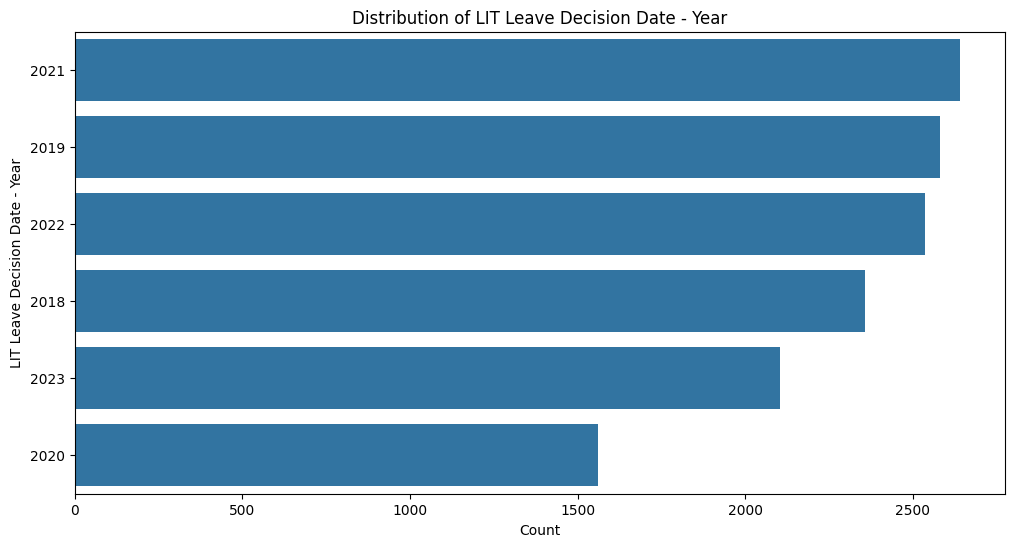

Distribution for Country of Citizenship:
Country of Citizenship
India                         947
Nigeria                       838
People's Republic of China    662
Pakistan                      497
Mexico                        420
                             ... 
Vanuatu                         1
Luxembourg                      1
Bhutan                          1
Macao SAR                       1
Iceland                         1
Name: count, Length: 180, dtype: int64


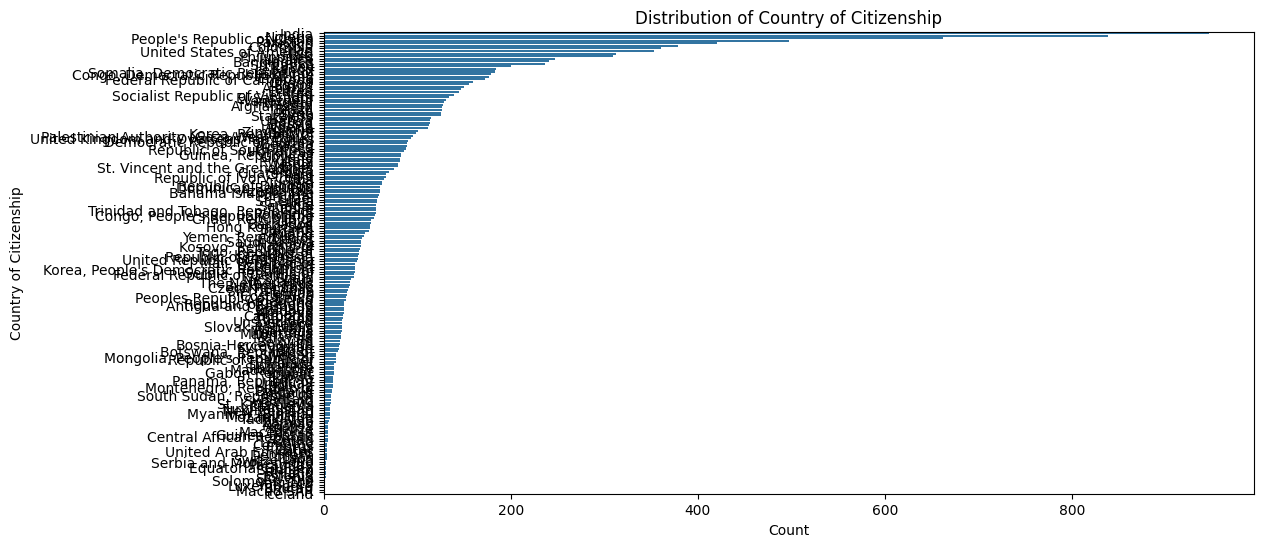

Distribution for LIT Leave Decision Desc:
LIT Leave Decision Desc
Dismissed at Leave                   6011
Allowed                              3148
Discontinued - Withdrawn at Leave    2861
Discontinued - Consent at Leave      1454
Allowed - Consent                     260
Not Started at Leave                   37
No Leave Required                       8
Leave Exception                         2
Name: count, dtype: int64


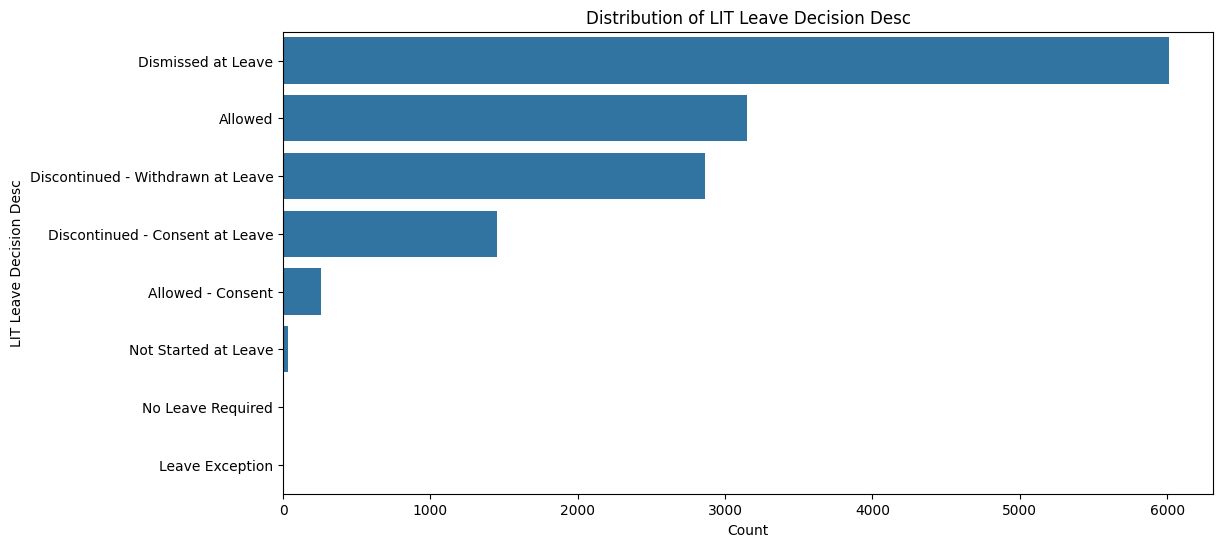

Distribution for LIT Case Type Group Desc:
LIT Case Type Group Desc
RAD Decisions           3403
Visa Officer Refusal    2394
Removal Order           1965
RPD Decisions           1741
HC Decisions            1091
PRRA                     963
Mandamus                 828
Removal Arrangements     568
IAD Decisions            441
ID Decisions             176
Other                     88
Refugee Eligibility       41
In-Canada Classes         35
Detention                 24
Citizenship Program       20
DFN                        2
Danger Opinions            1
Name: count, dtype: int64


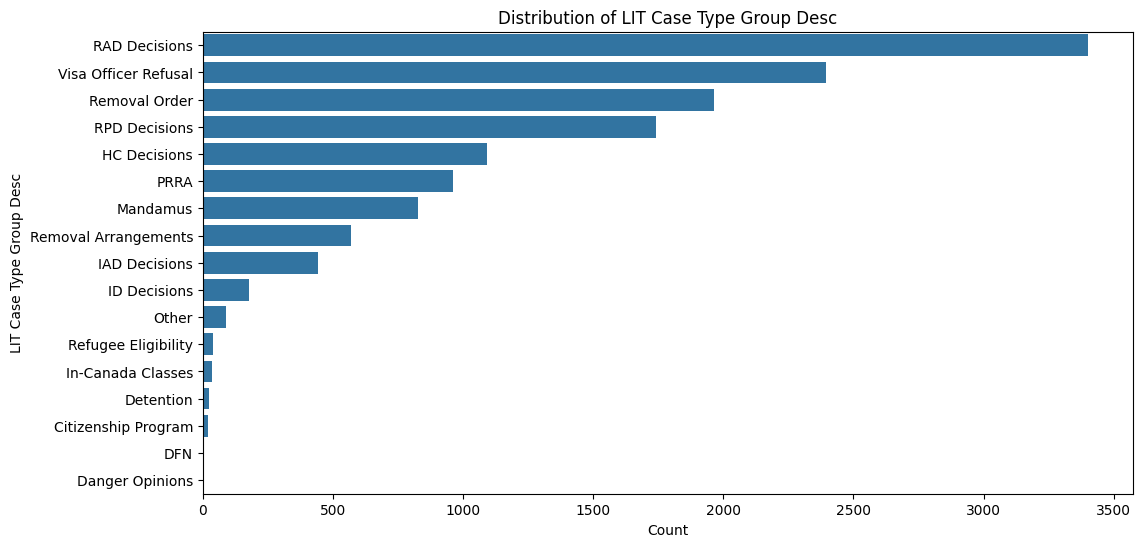

Distribution for LIT Case Type Desc:
LIT Case Type Desc
RAD-Dismissed-Confirmed-Same     2663
Visa Officer Decision            2394
Minister-Other / Other Admin.    1728
RPD-Not CR/Protected Person      1210
HC Refusal-Perm Res              1081
                                 ... 
Renunciation 9(1)-PS Decision       1
ICLC-Spouse                         1
MO-To effect Removal Order of       1
Minor Grant - PS Decision           1
ID-Non-Disclosure                   1
Name: count, Length: 62, dtype: int64


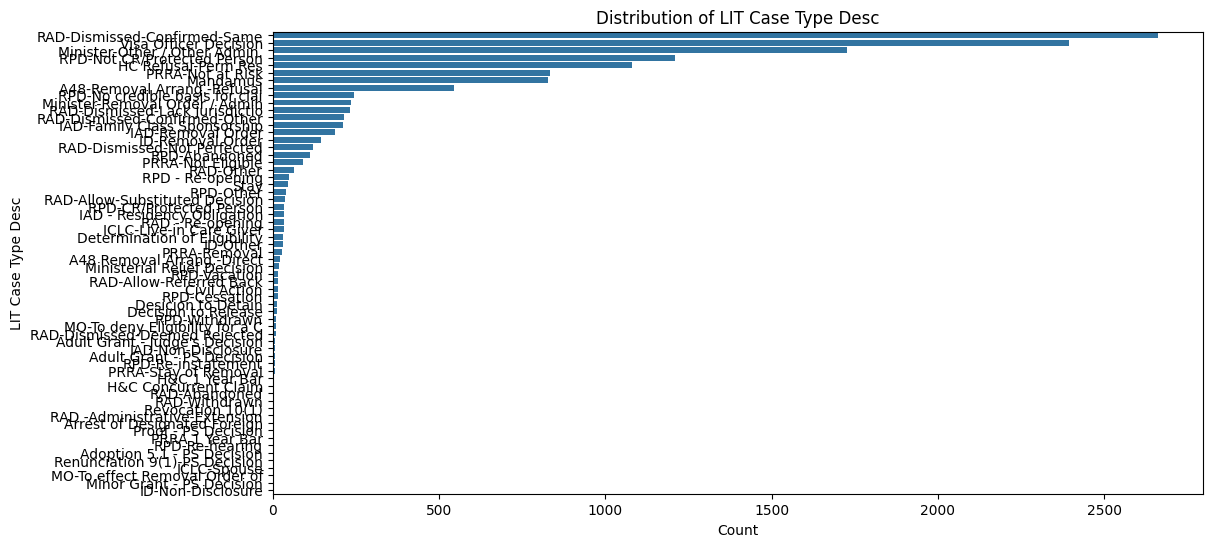

Distribution for LIT Filed By Desc:
LIT Filed By Desc
Person Concerned    13120
Third Party           451
Minister - CIC        154
Minister - CBSA        56
Name: count, dtype: int64


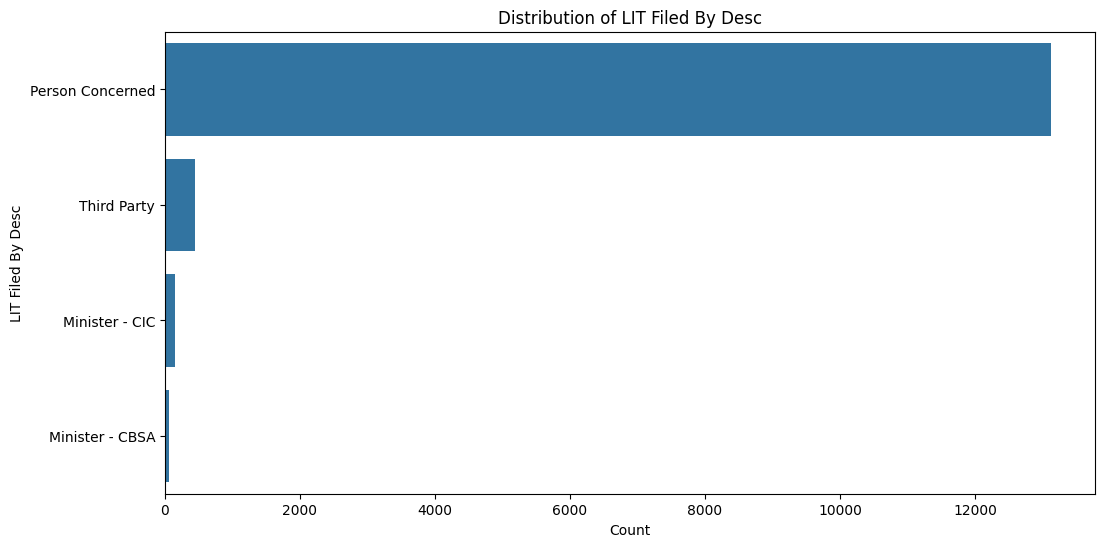

Distribution for LIT Tribunal Type Desc:
LIT Tribunal Type Desc
Federal Court              13672
Federal Court of Appeal       96
Supreme Court of Canada       12
UNHRC                          1
Name: count, dtype: int64


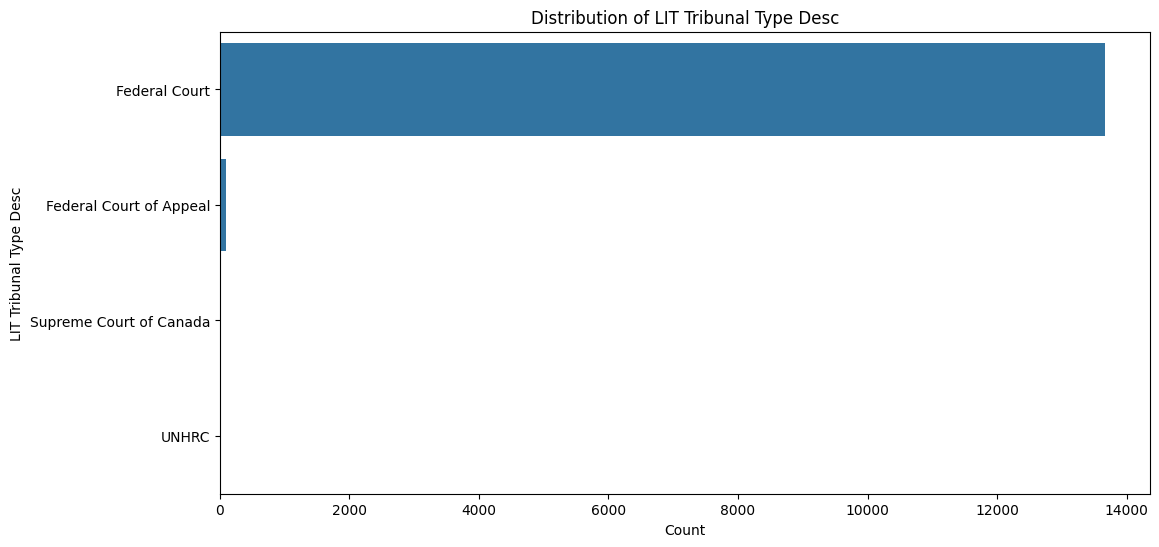

Distribution for LIT Primary Office Type Desc:
LIT Primary Office Type Desc
Inland                   8993
Port of Entry            2529
International Network    2259
Name: count, dtype: int64


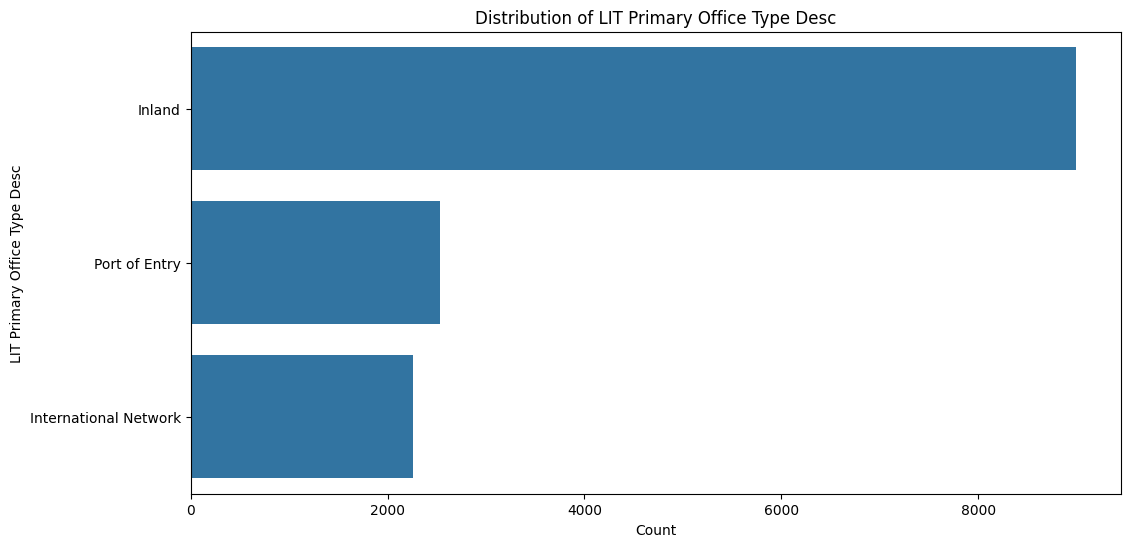

Distribution for LIT Primary Office Regional Group Desc:
LIT Primary Office Regional Group Desc
Unspecified                                                                   3071
Enforcement and Intelligence Operations Division                              2320
Humanitarian Migration and Integrity Division                                 2248
GTA West IRCC                                                                 1013
Montréal Facilitation Center                                                   712
Case Processing Centre Edmonton                                                611
Montérégie Border District                                                     581
Fort Erie District                                                             459
Passenger Operations District                                                  406
Regional HQ Prairies NT                                                        404
Ontario West Area                                                         

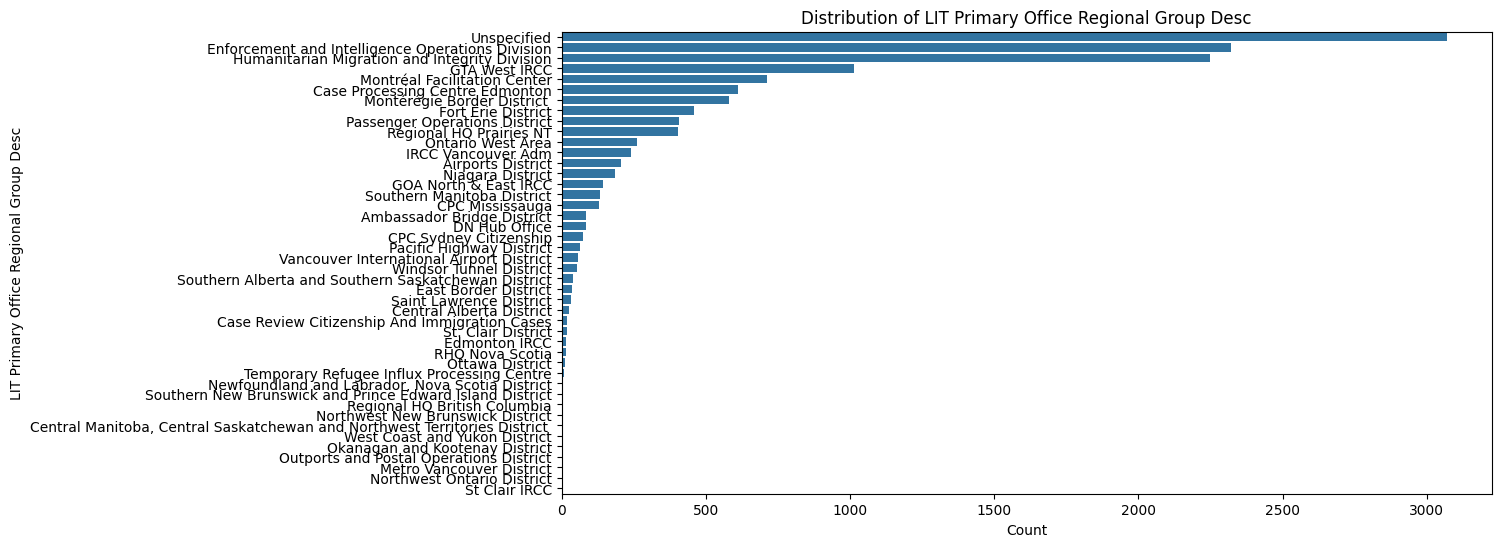

In [7]:
for column in categorical_columns:
    print(f"Distribution for {column}:")
    print(df[column].value_counts())
    plt.figure(figsize=(12, 6)) 
    sns.countplot(y=column, data=df, order=df[column].value_counts().index) 
    plt.title(f'Distribution of {column}') 
    plt.xlabel('Count')  
    plt.ylabel(column)  
    plt.show()

### 2.2 For Numerical Features:
- Most cases have relatively low litigation counts, but a few outliers show very high values.
- The presence of outliers suggests that there are cases with exceptional circumstances or rare events, which should be considered during analysis to avoid bias in interpretation.

In [8]:
numerical_columns = df.select_dtypes(include='number').columns
print(df[numerical_columns].describe())


       LIT Litigation Count
count          13781.000000
mean               3.505406
std               14.636497
min                1.000000
25%                1.000000
50%                1.000000
75%                3.000000
max              736.000000


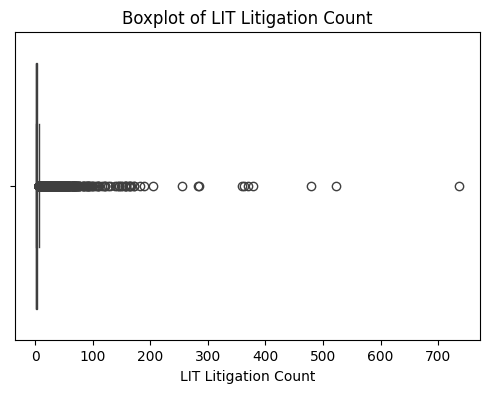

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


### 3. Correlation Between Features

- For the 'Country of Citizenship' column, filter for the top 10 most frequent countries to avoid clutter in the heatmap. For other categorical columns, analyze their relationships using cross-tabulation and visualize the results with heatmaps weighted by LIT Litigation Count.
- The only numerical feature, 'LIT Litigation Count,' is analyzed in relation to categorical features using boxplots.
- Some insights into the relationship between LIT Case Type Desc and other features; for further insights into the rest of the features, please see the heatmap below:
  - Most cases are processed in the Federal Court, with certain case types (like RAD Decisions and Visa Officer Refusal) being more prominent in specific tribunals.
  - A large number of cases in categories like RAD Decisions and RPD Decisions result in "Dismissed at Leave" or "Discontinued - Withdrawn at Leave" decisions.
  - A large volume of cases are filed by the Minister-CBSA, particularly for RAD and RPD decisions.
  - "Inland" and "Port of Entry" are the primary locations for many case types, with "RAD Decisions" and "Visa Officer Refusal" cases being heavily concentrated in the "International Network" region.
  - The interrelation between various case types reveals that RAD Decisions and RPD Decisions are heavily interconnected with other types, particularly for "Removal Orders" and "Visa Officer Refusals."
  - A large portion of cases, particularly those under RAD Decisions and Visa Officer Refusal, are handled by the Federal Court.

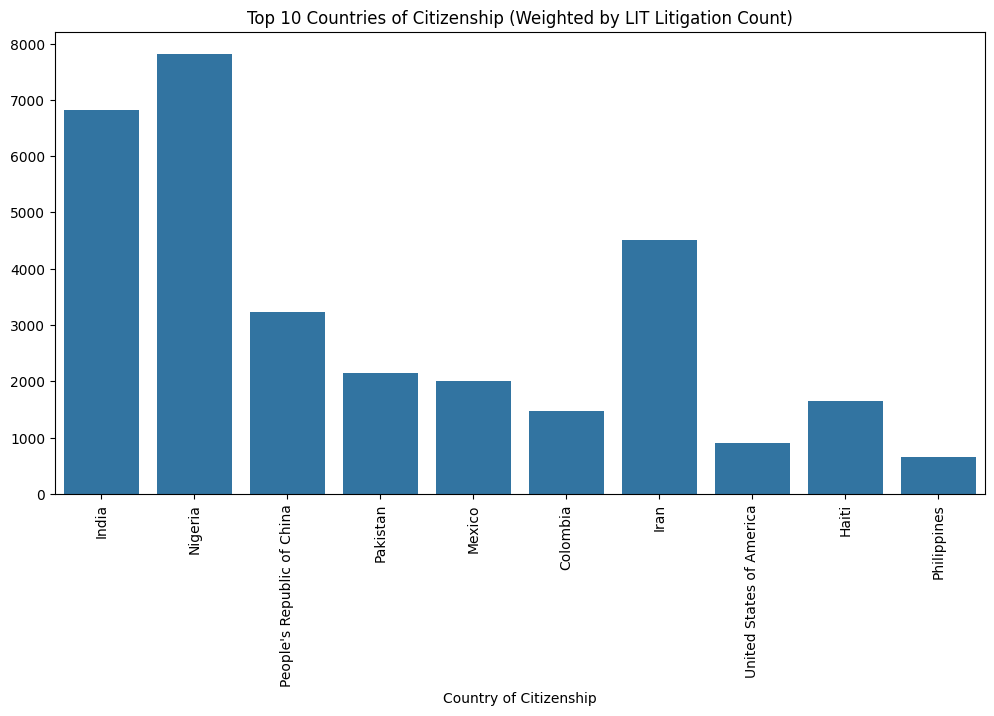

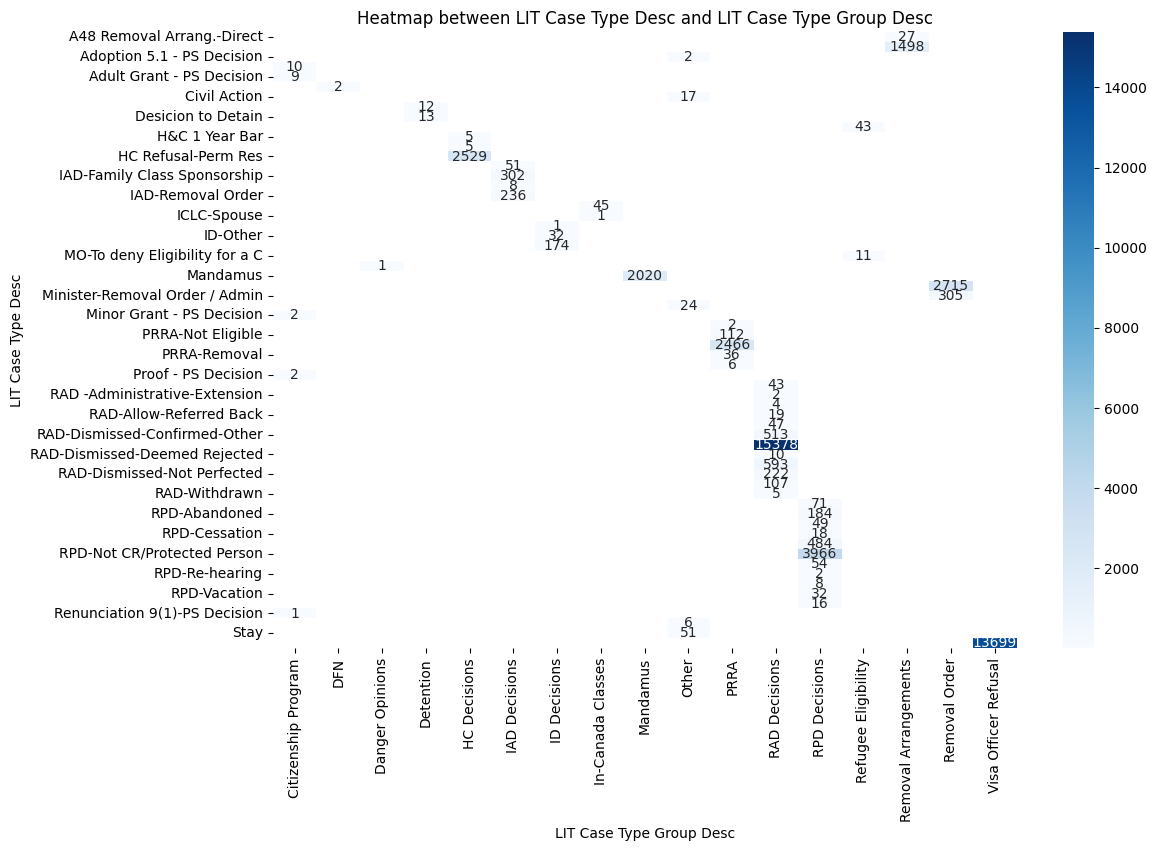

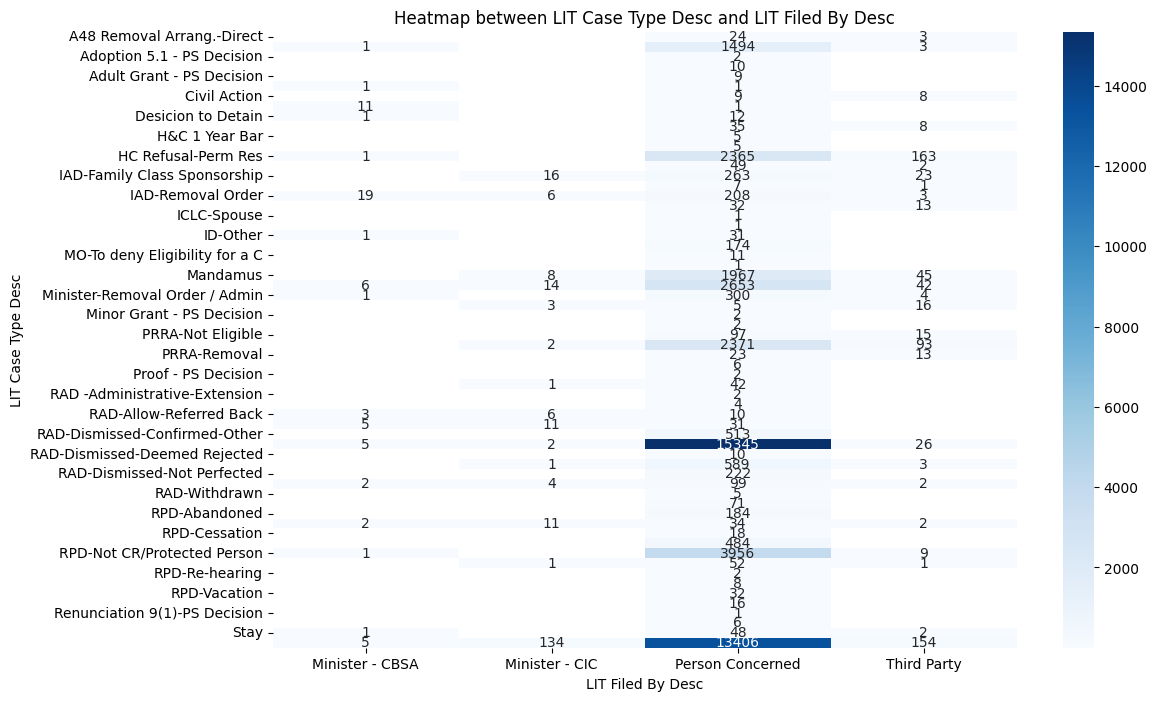

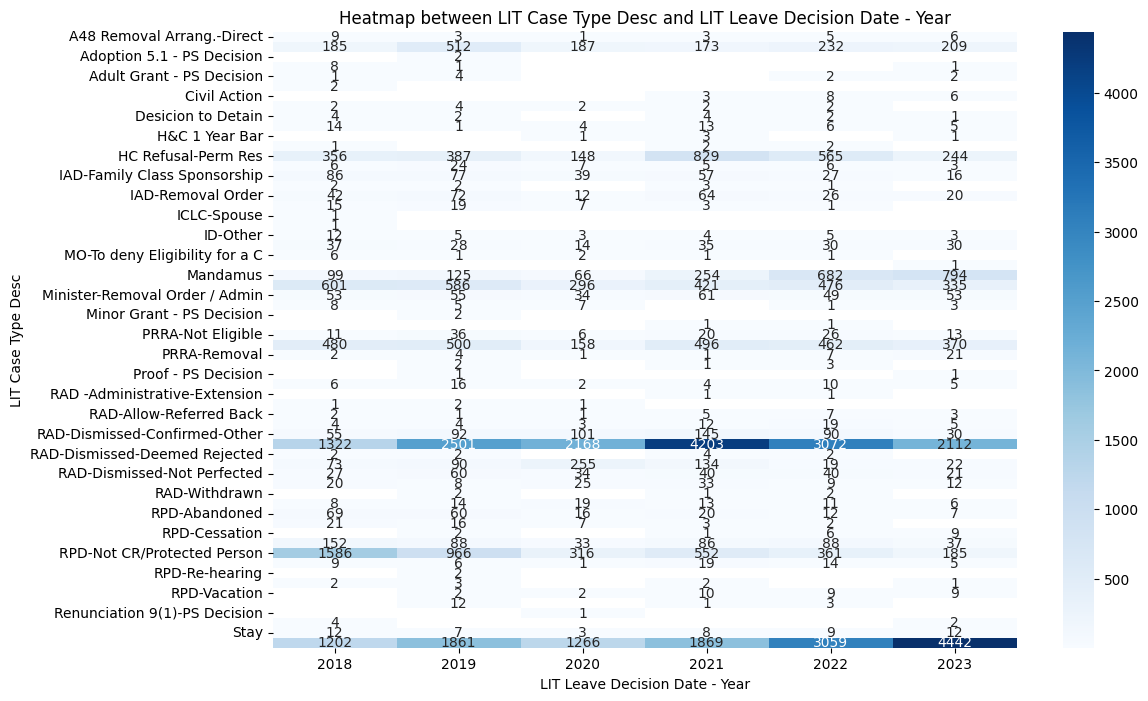

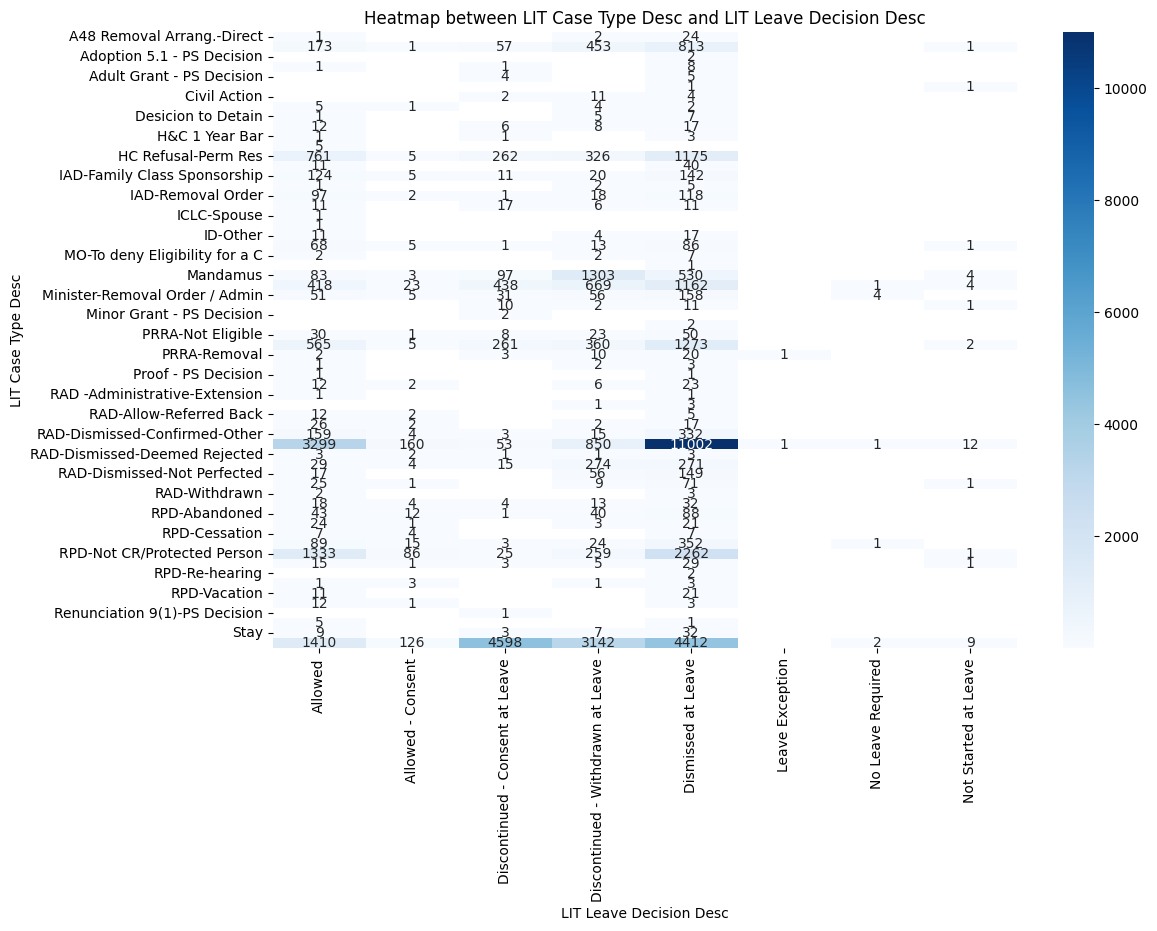

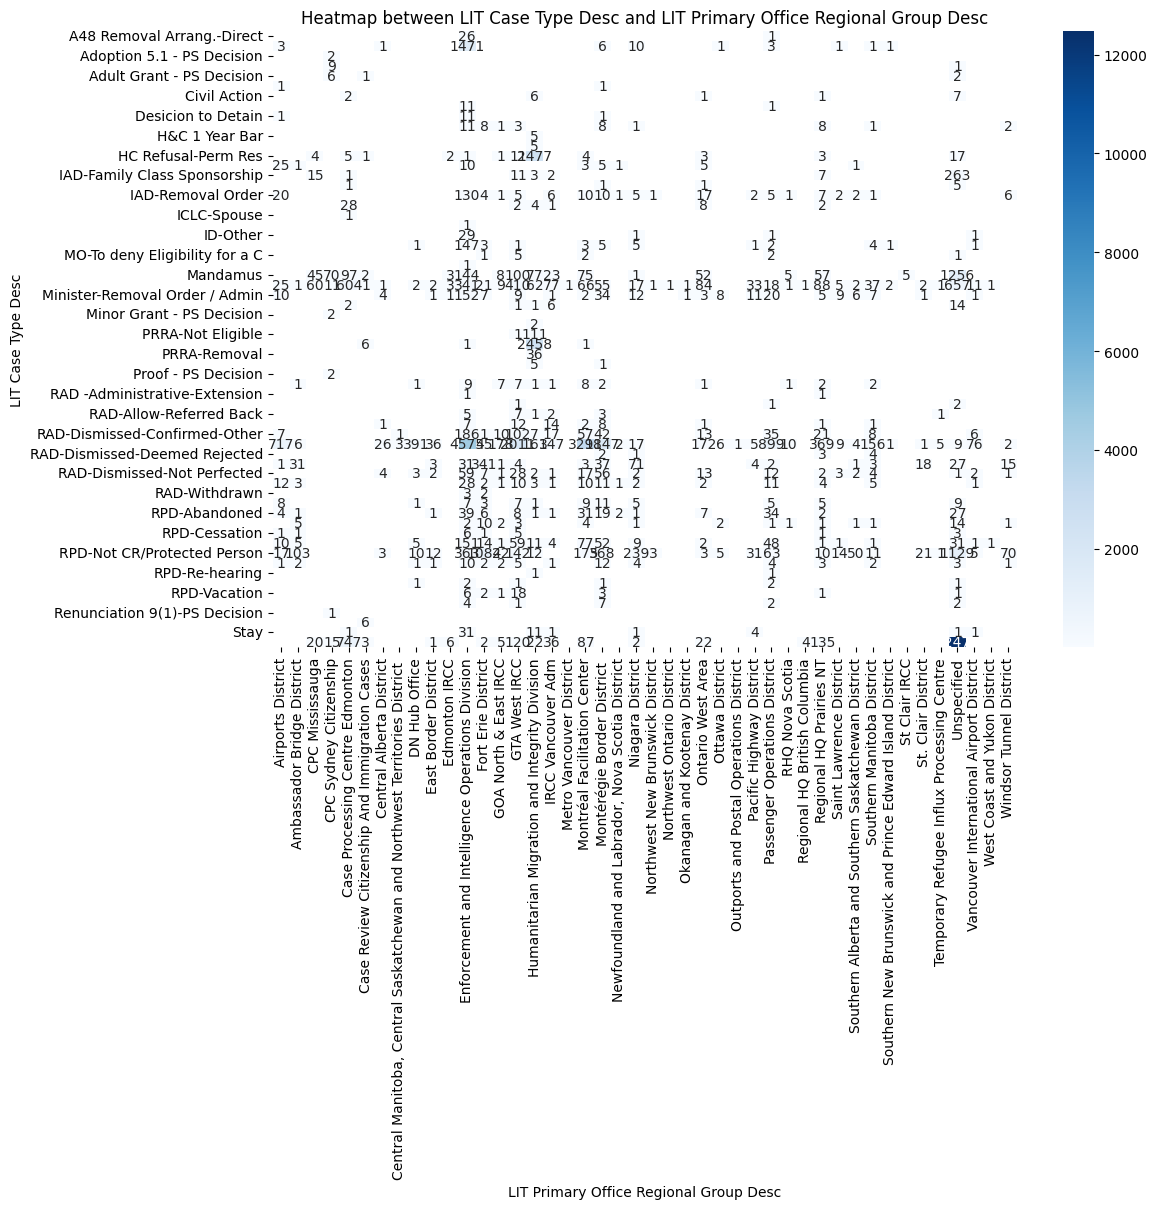

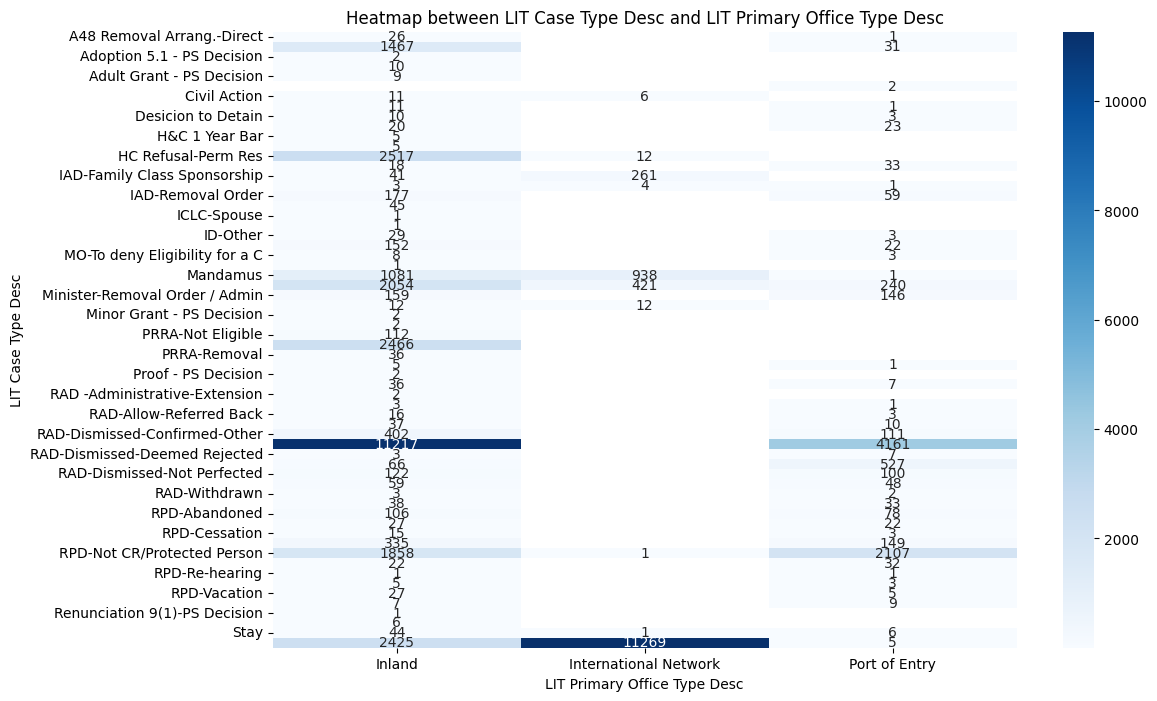

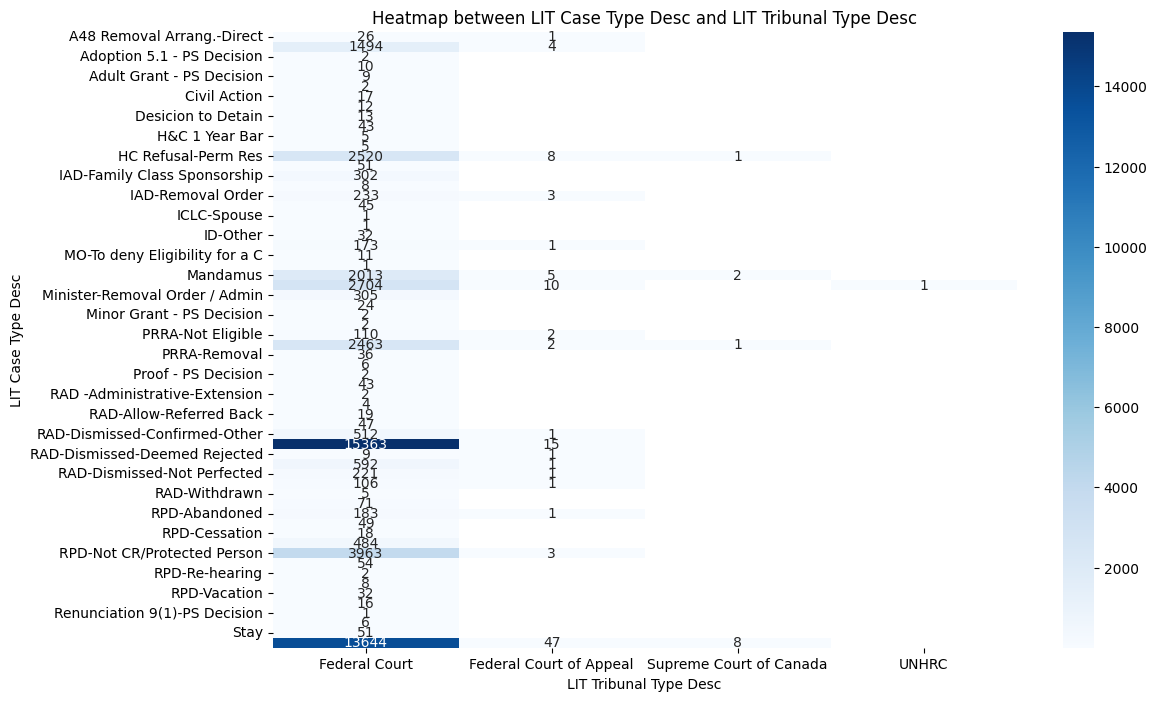

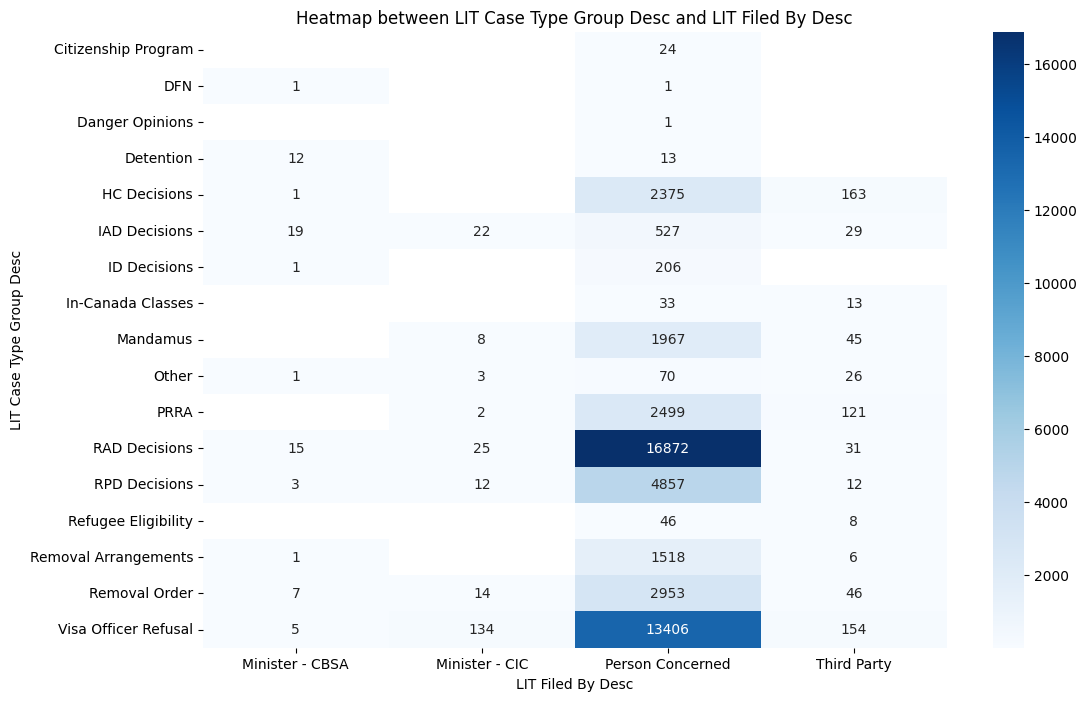

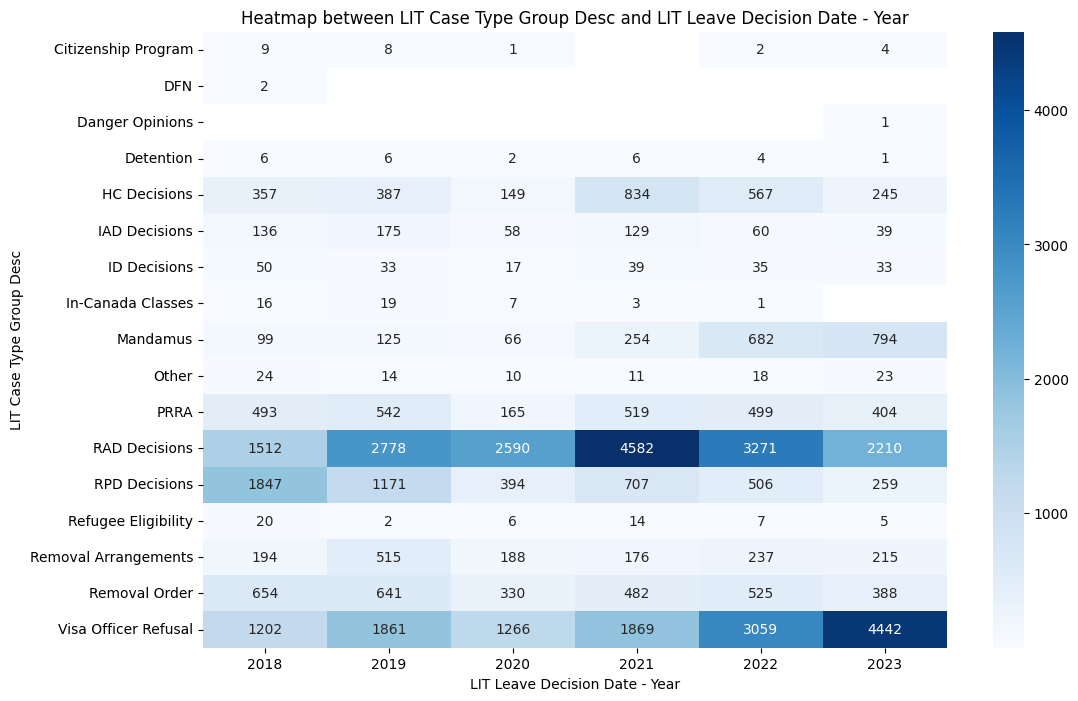

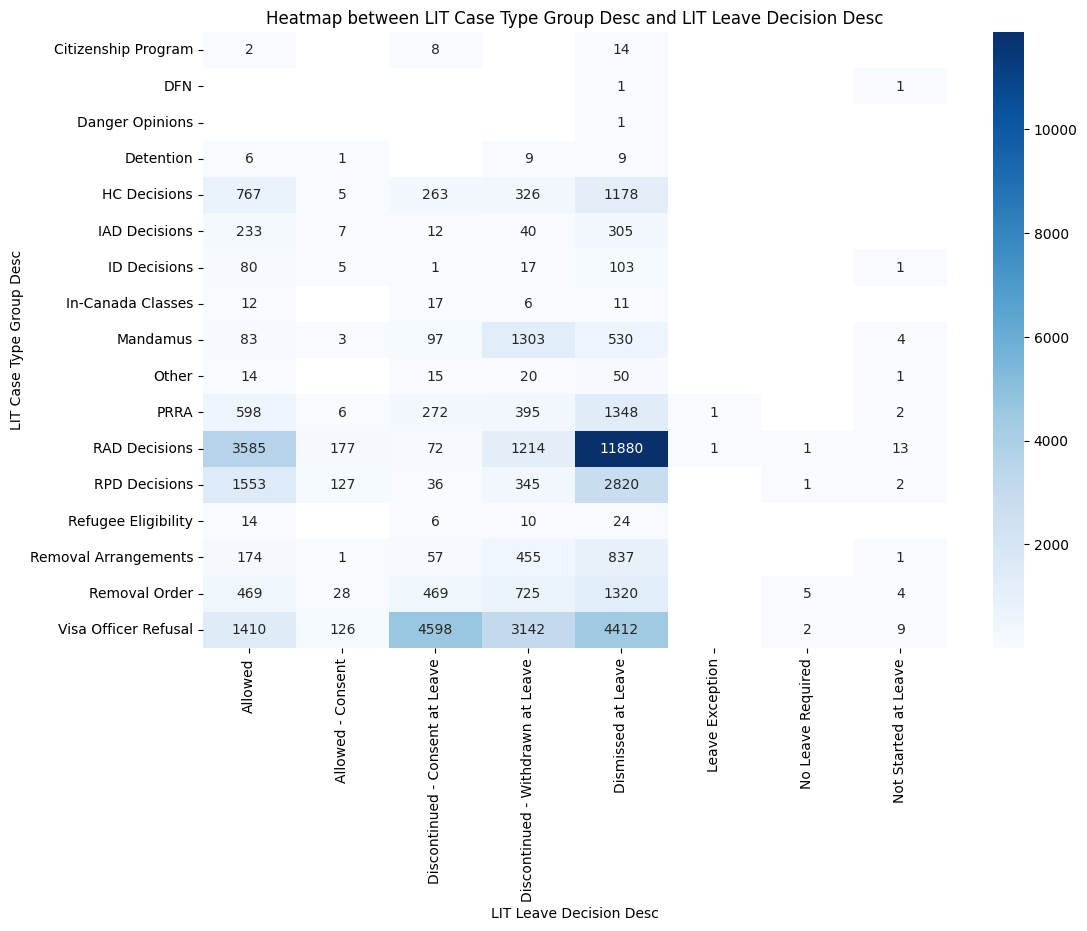

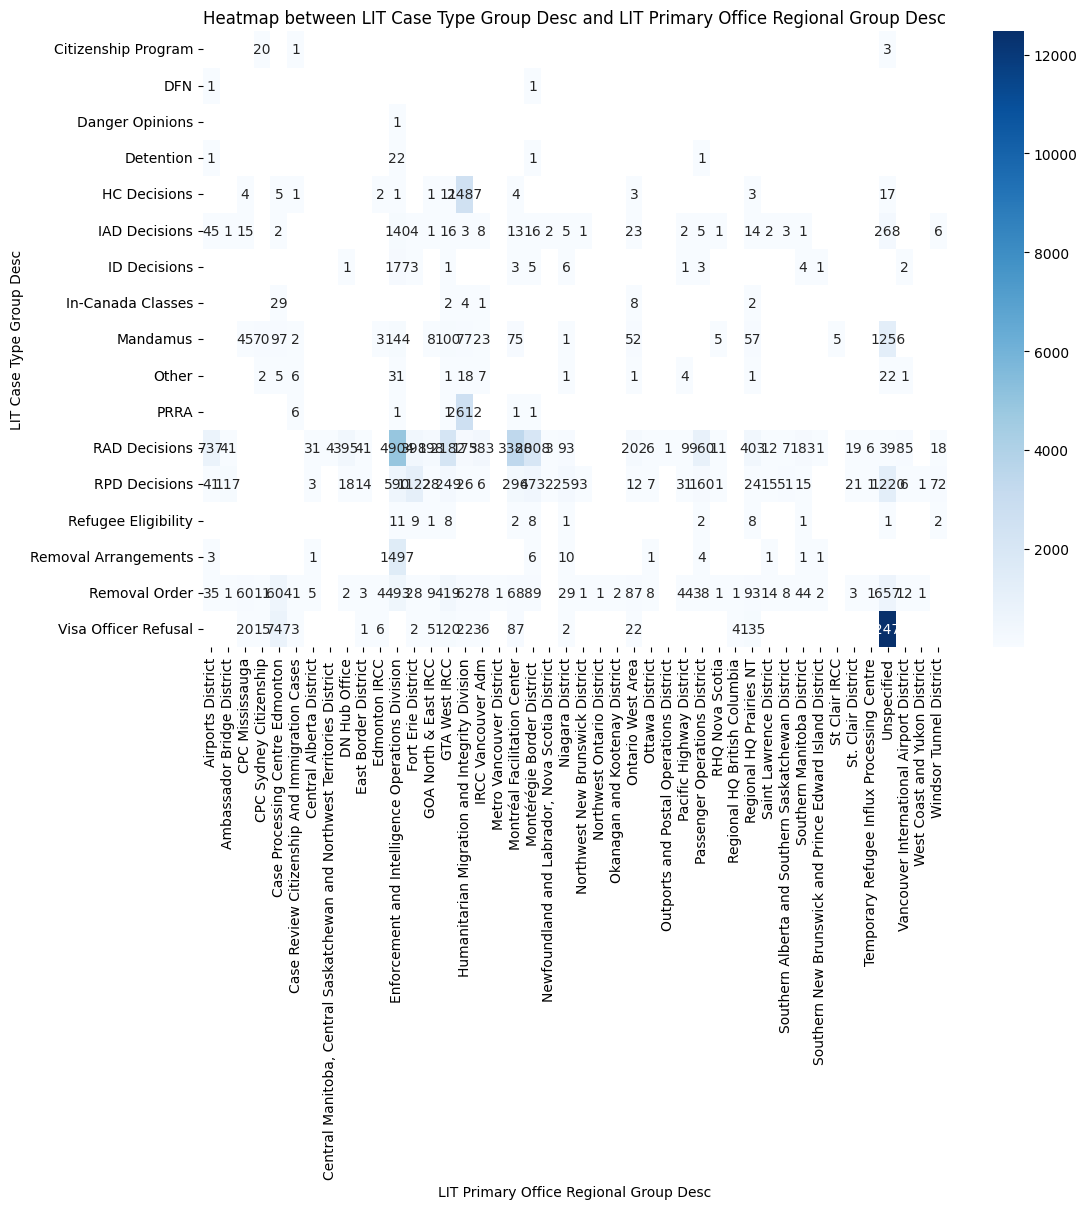

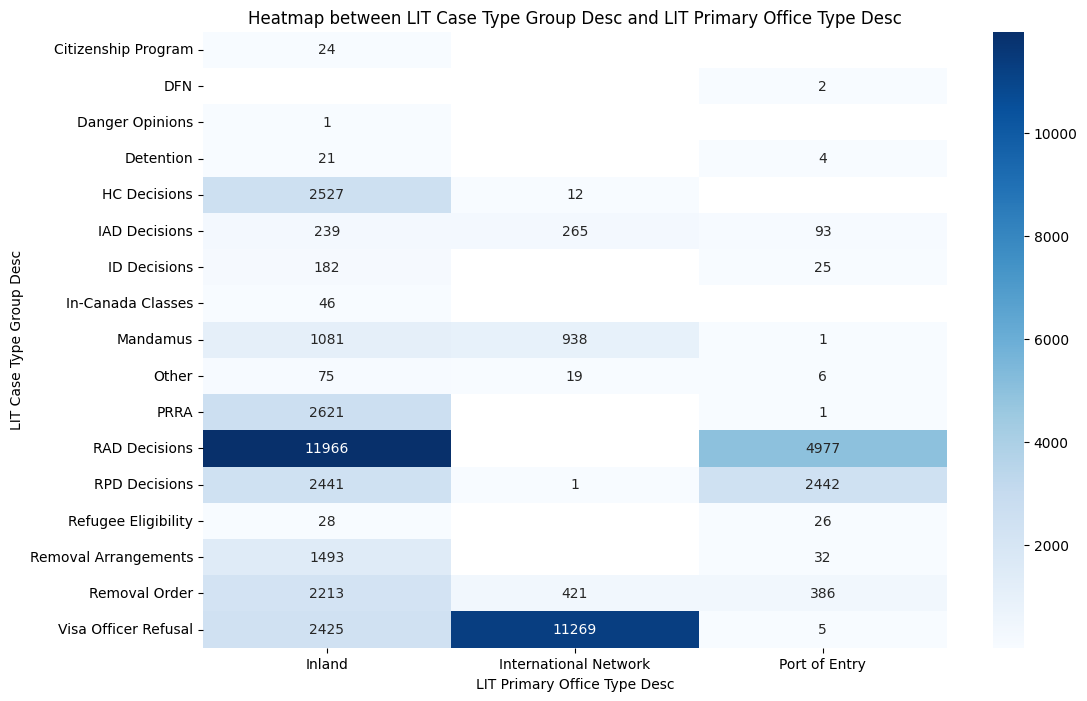

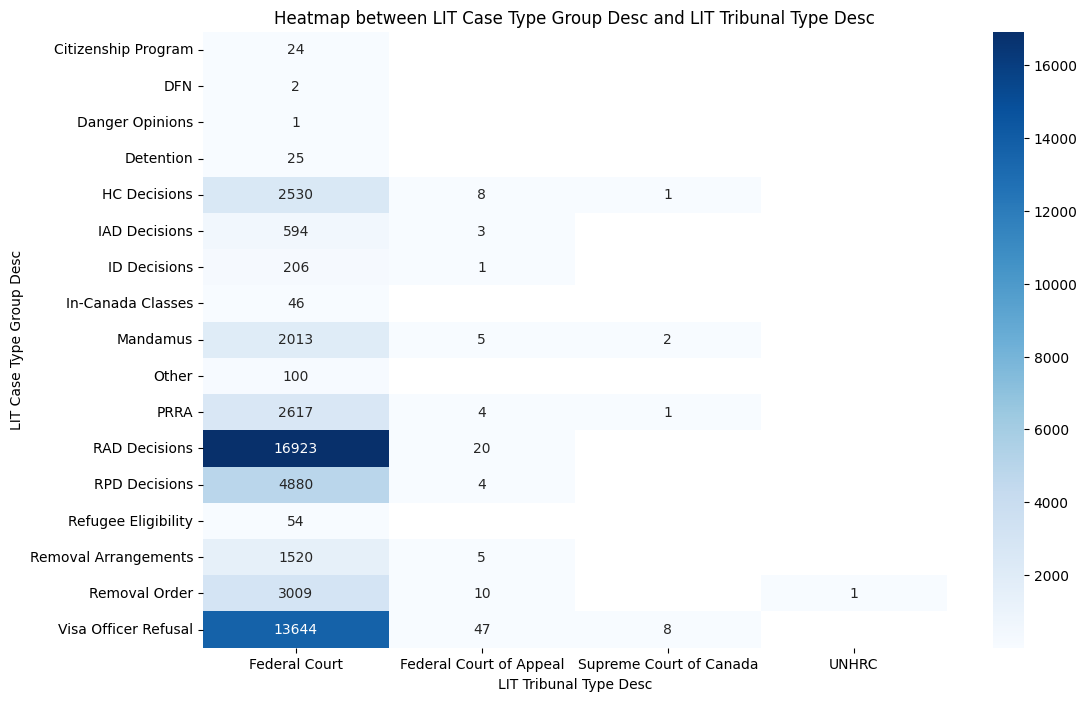

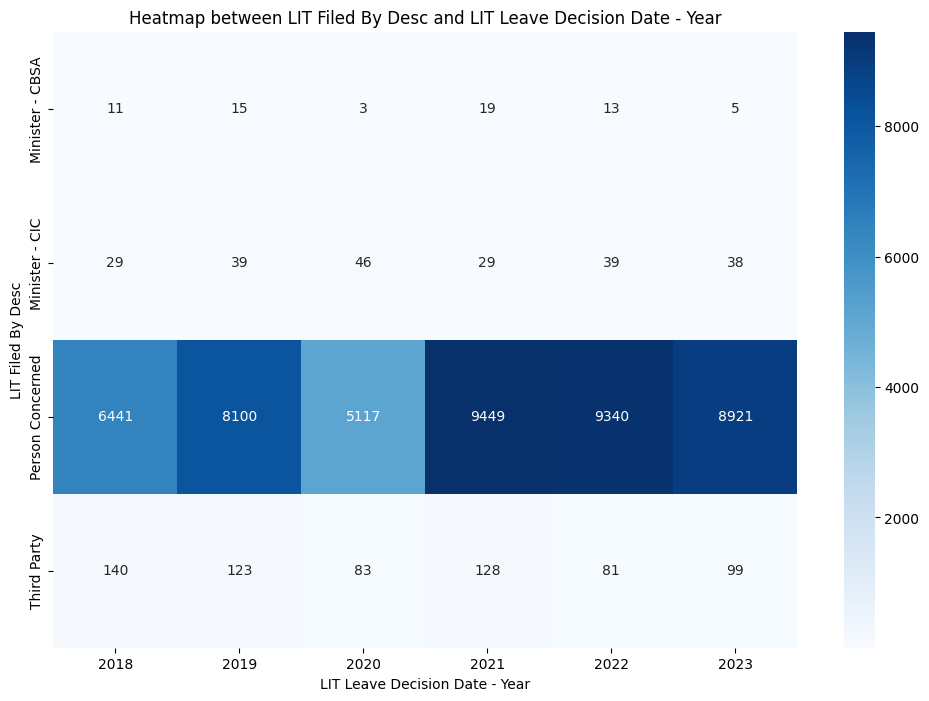

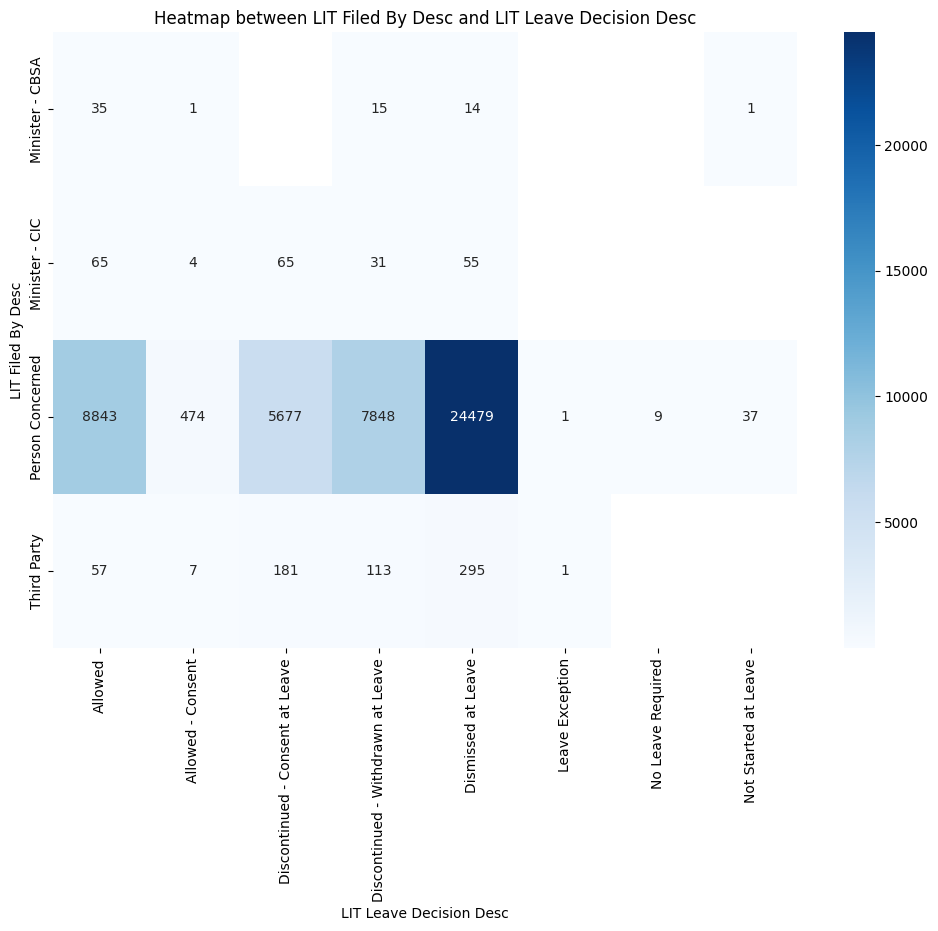

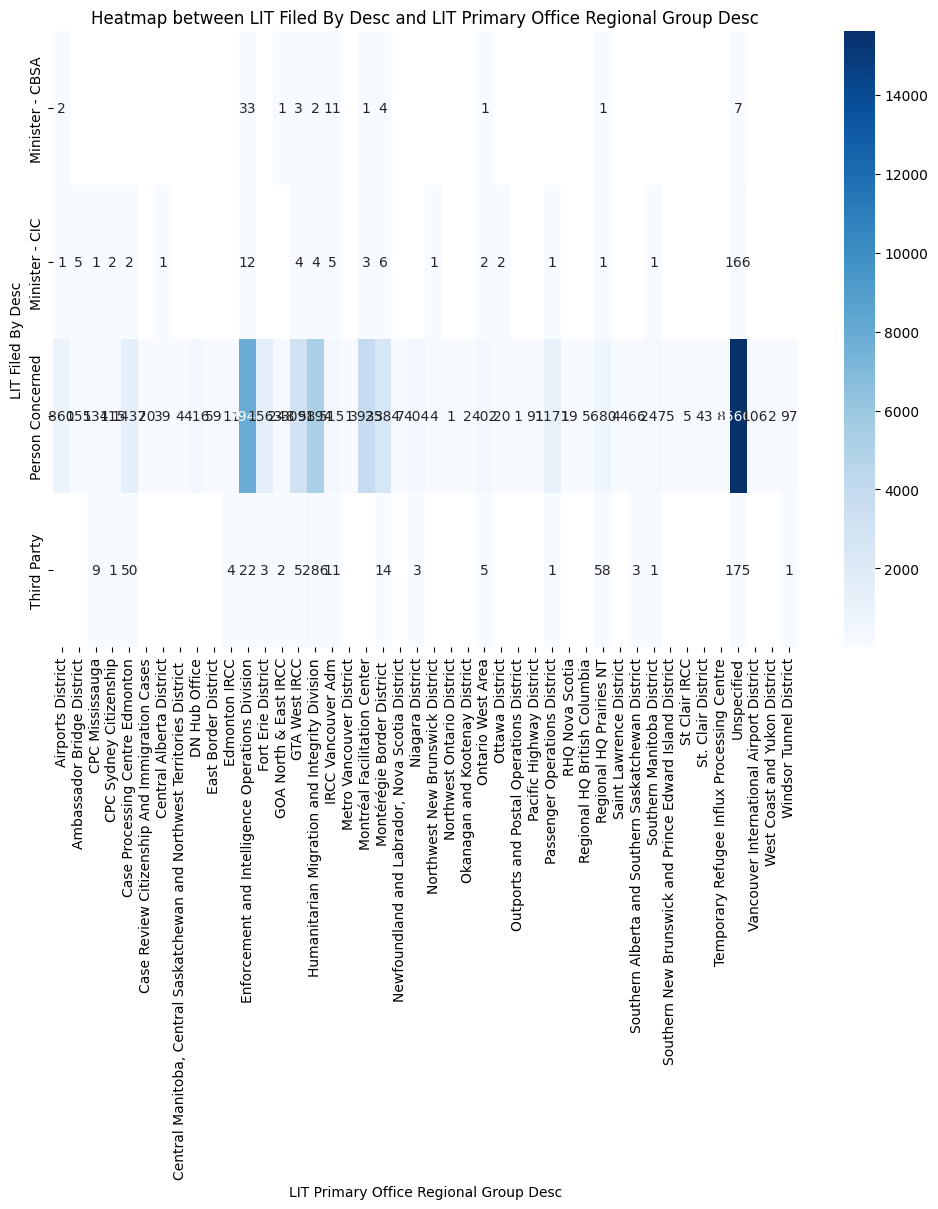

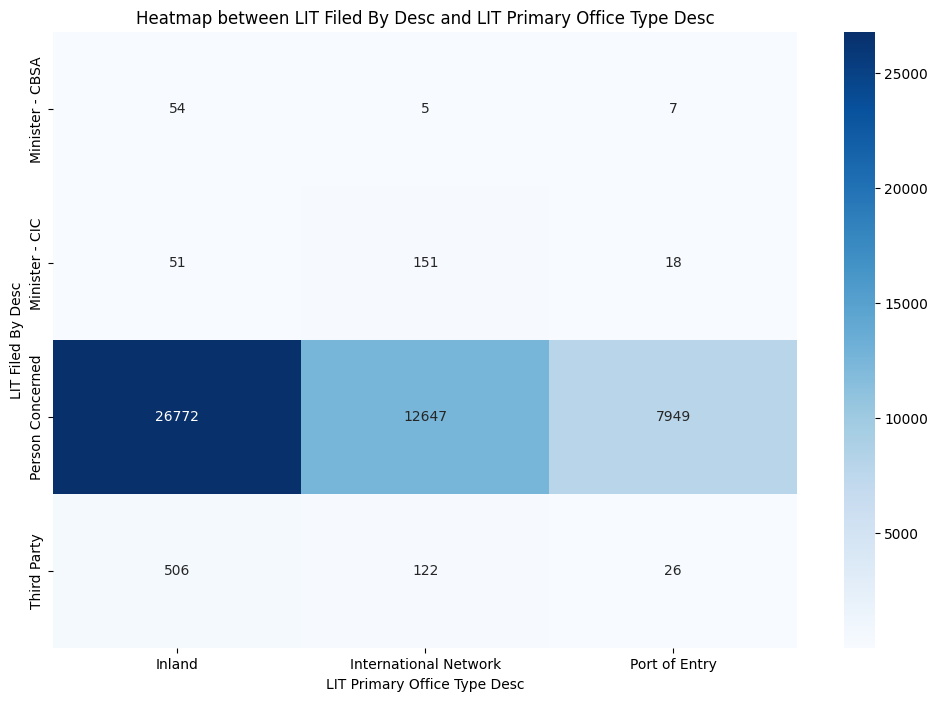

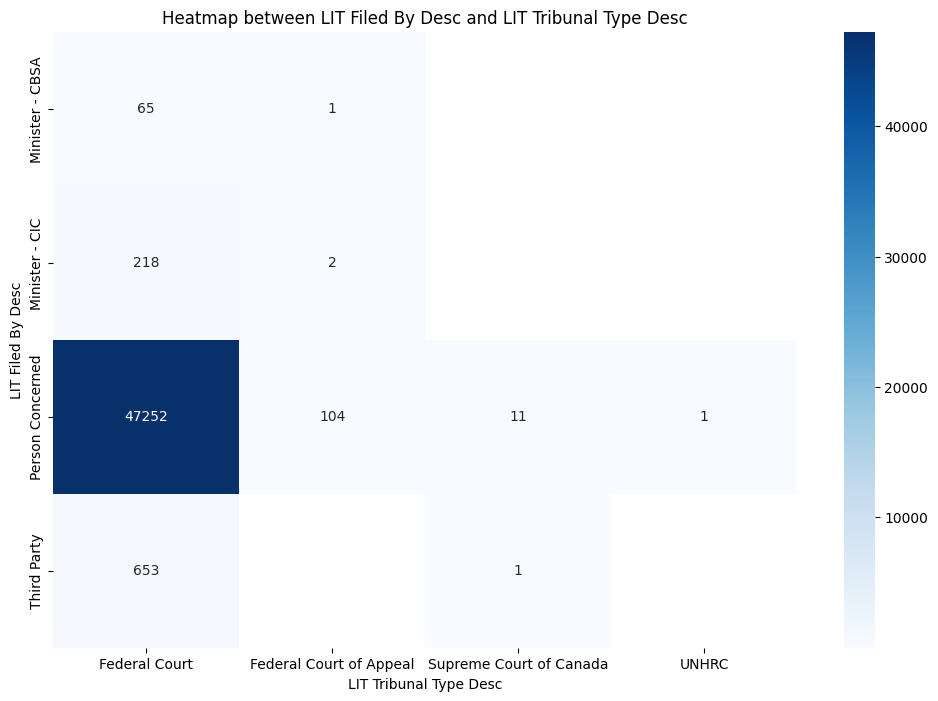

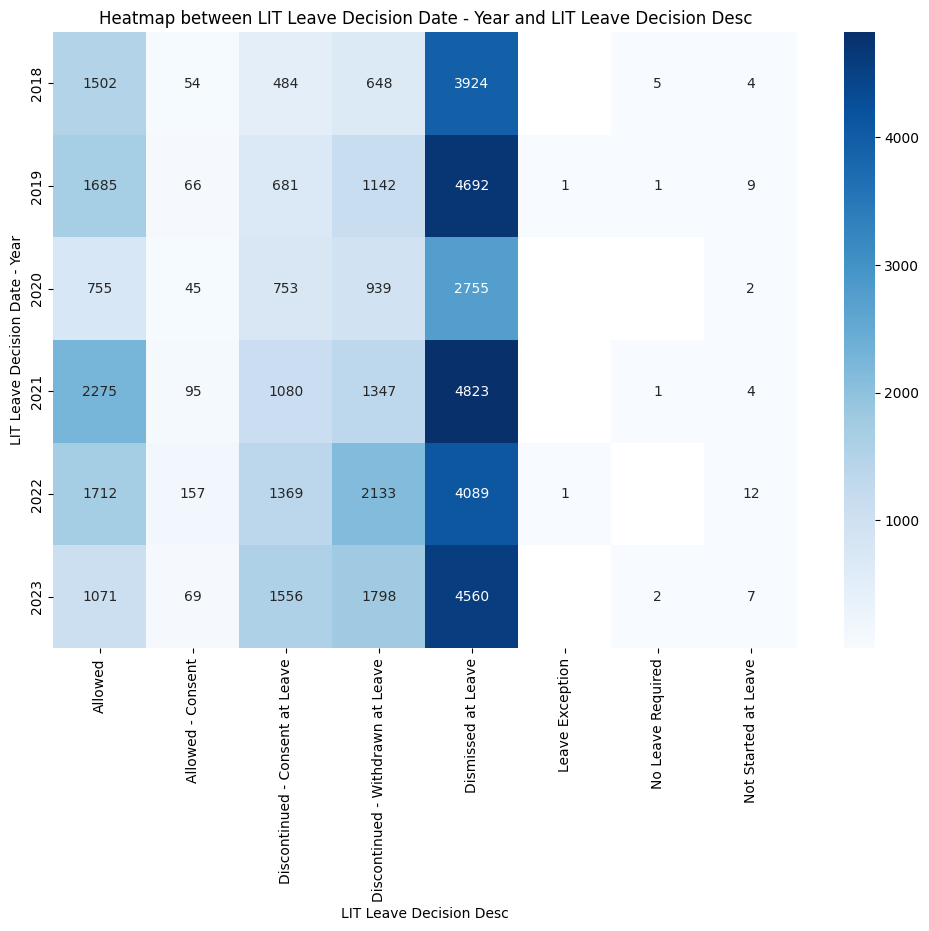

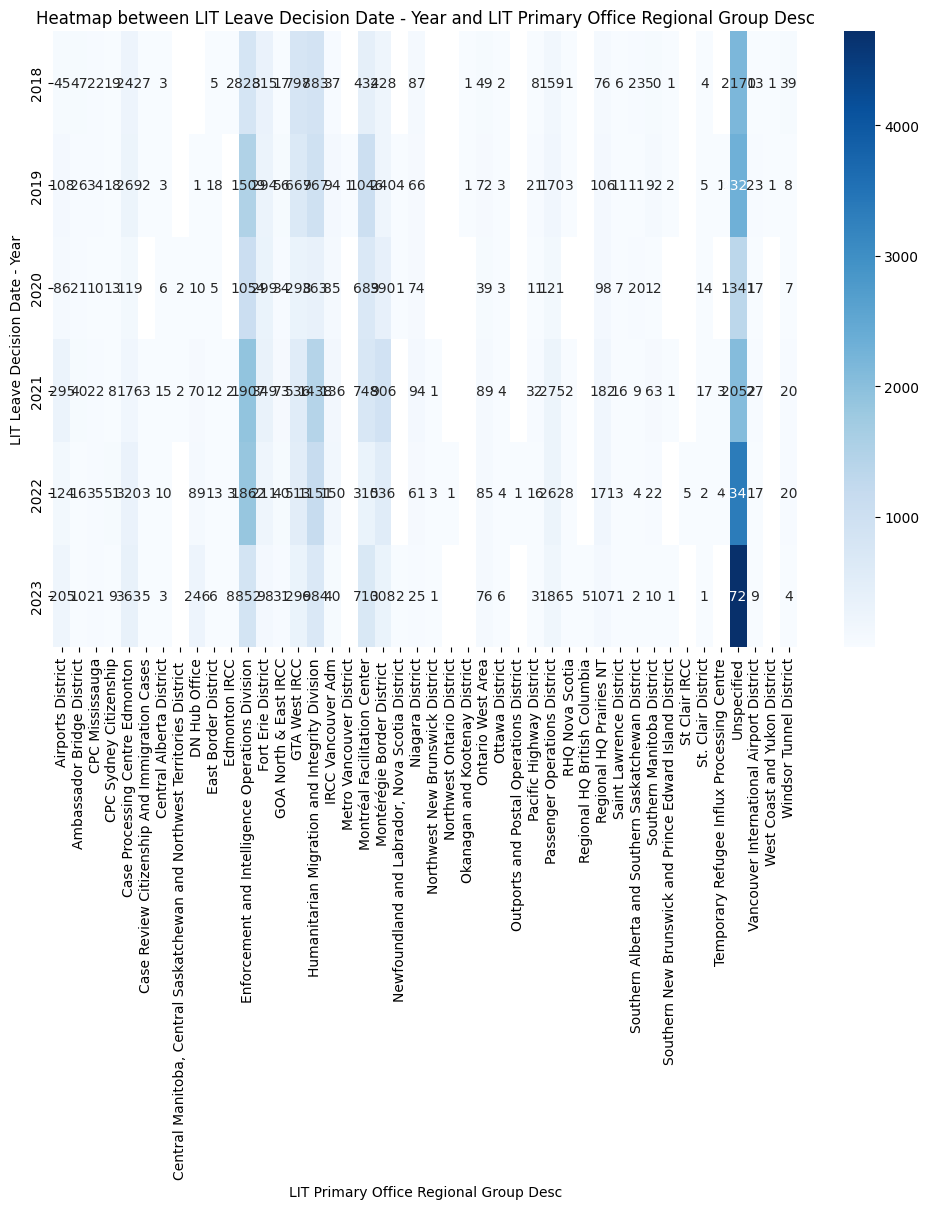

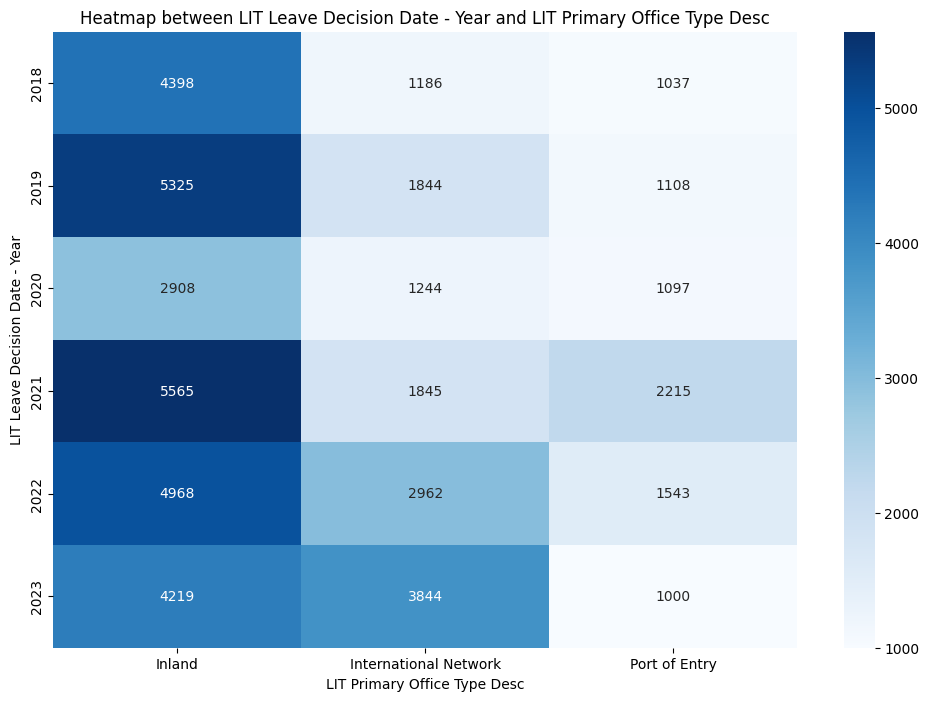

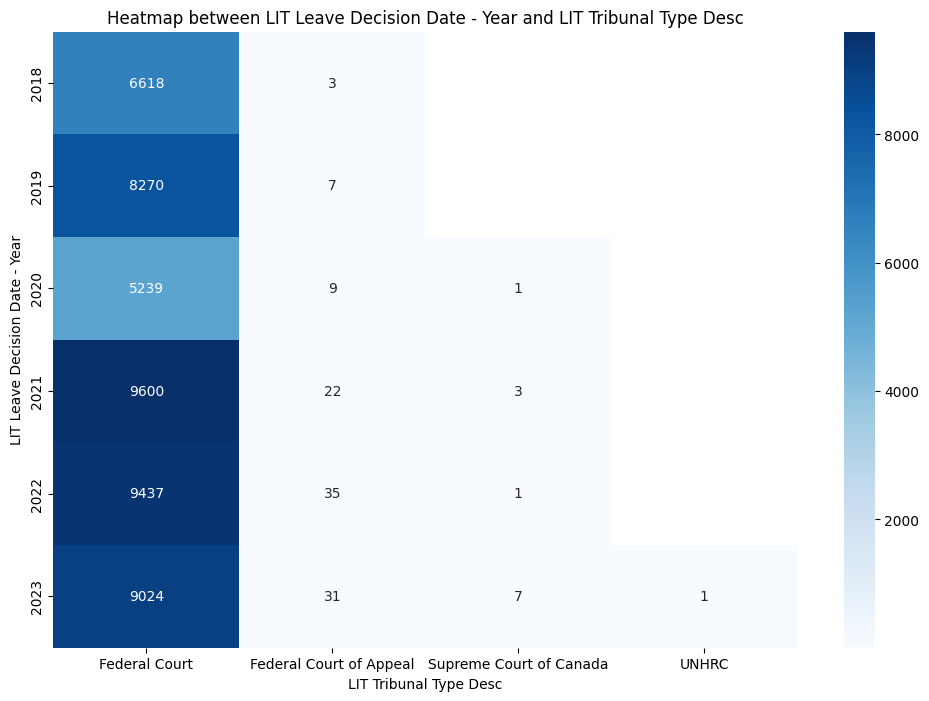

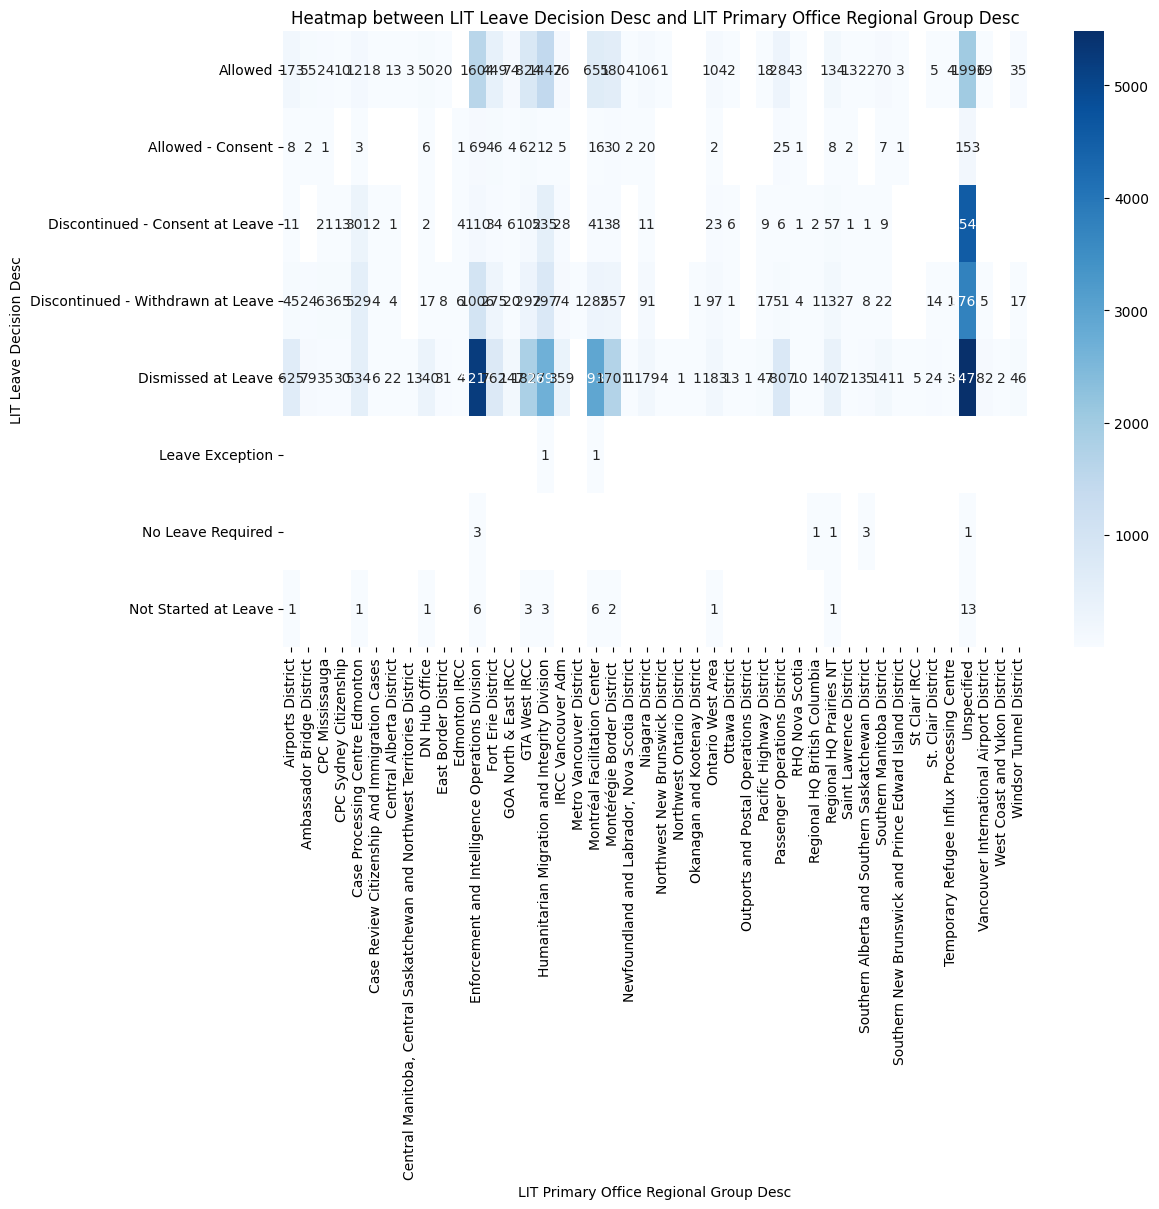

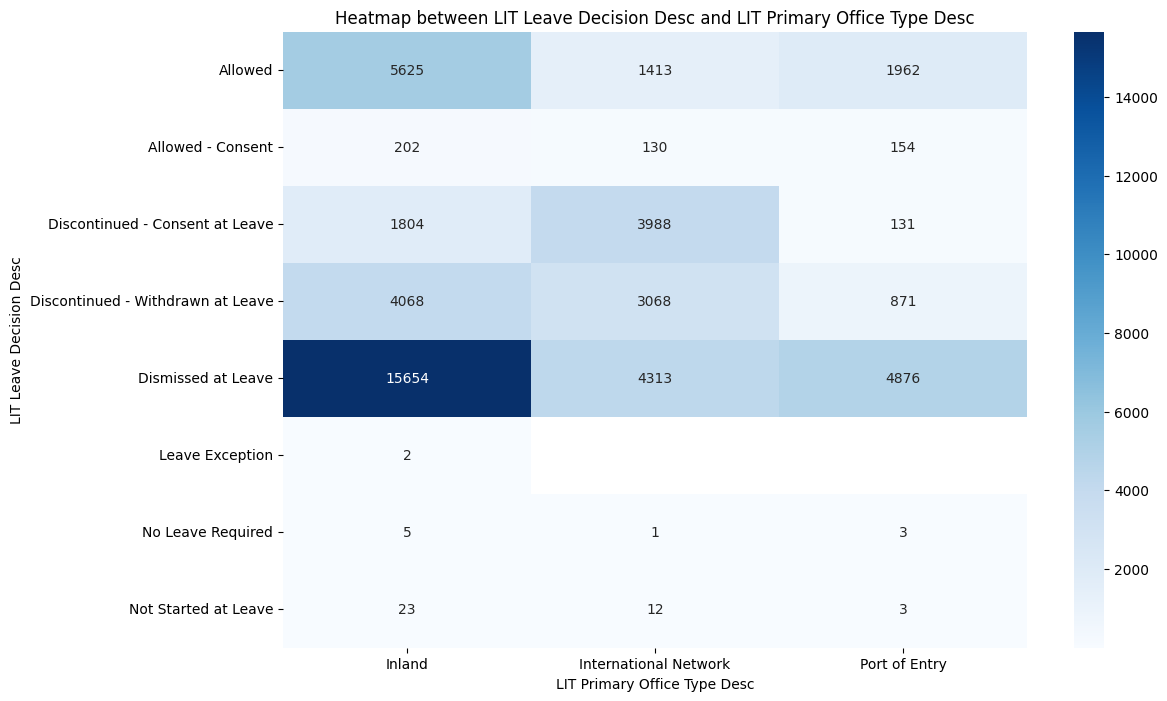

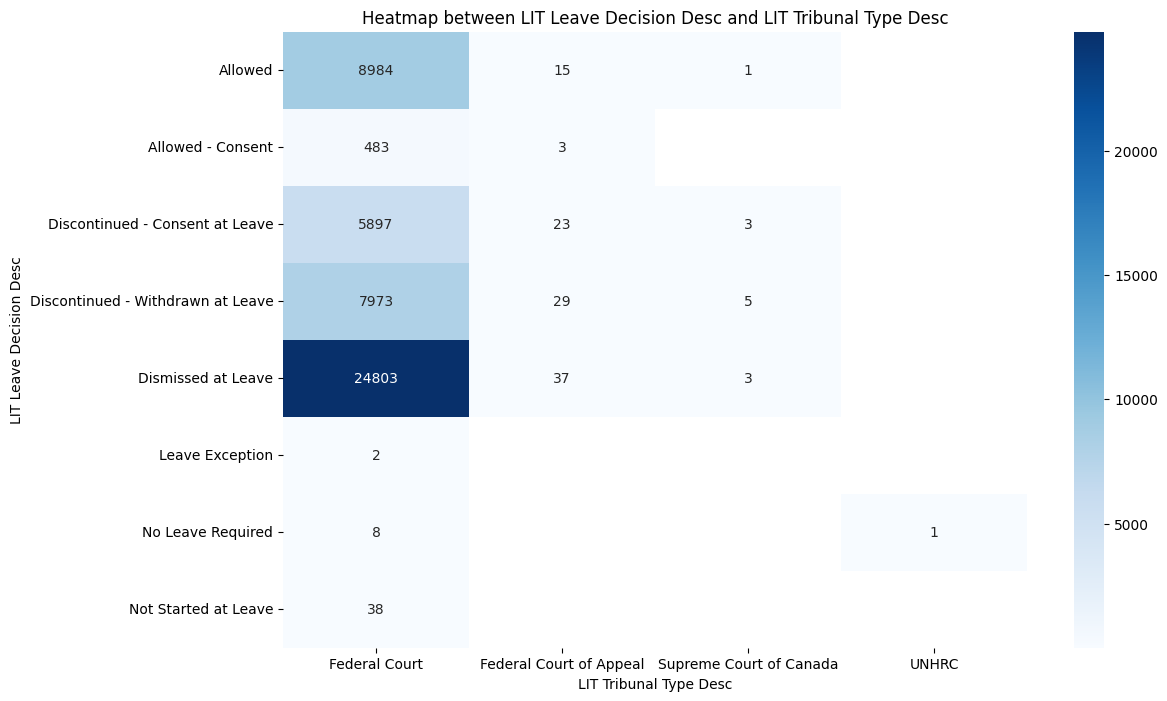

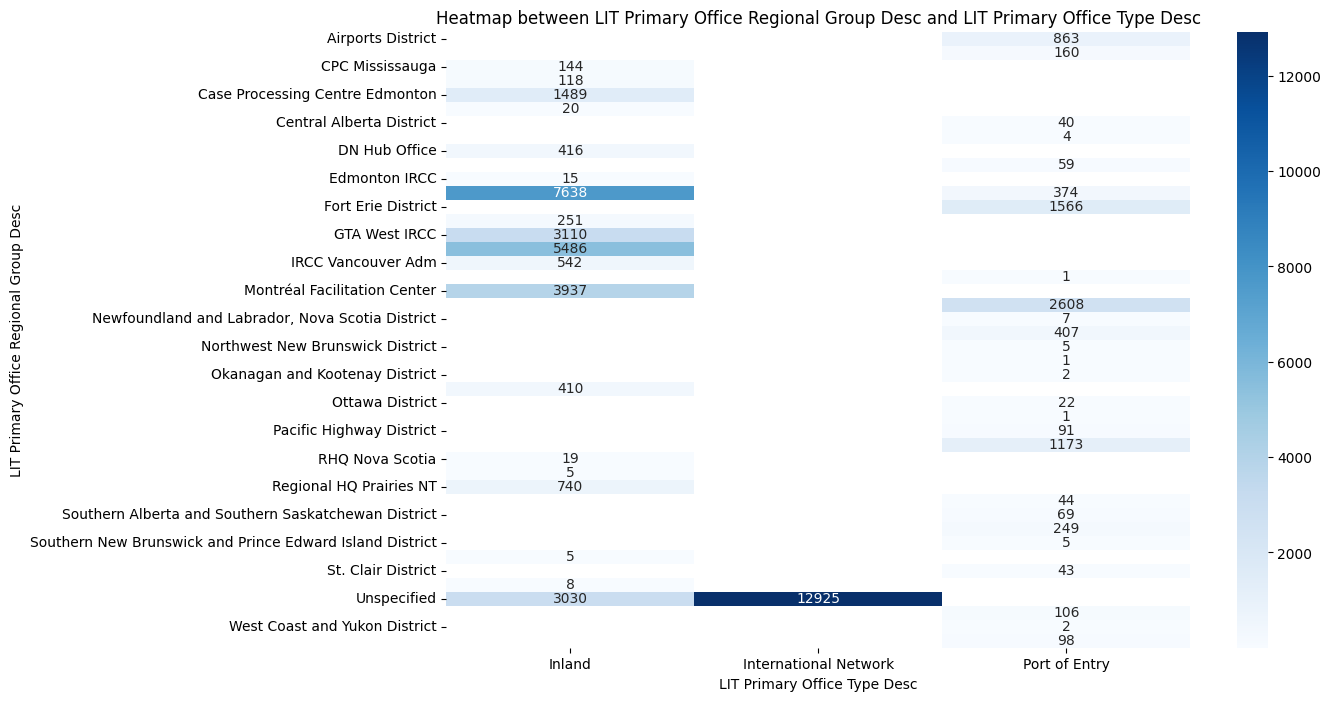

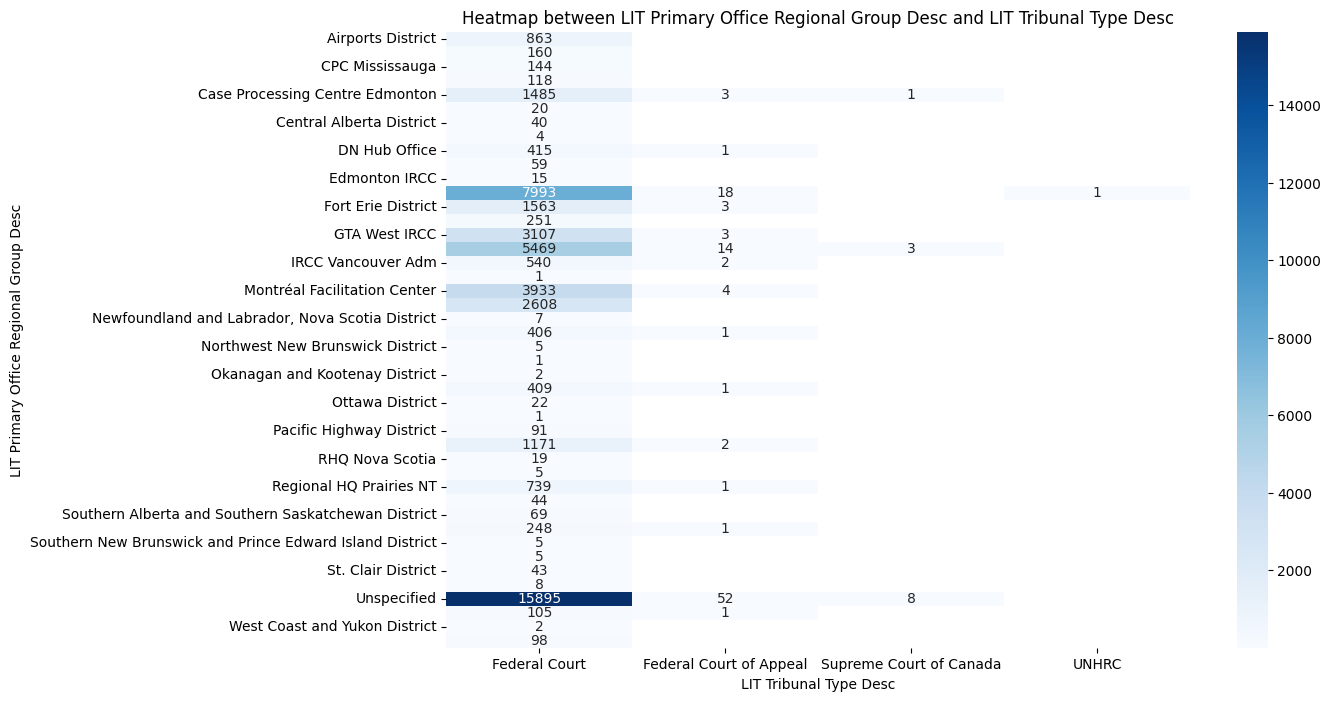

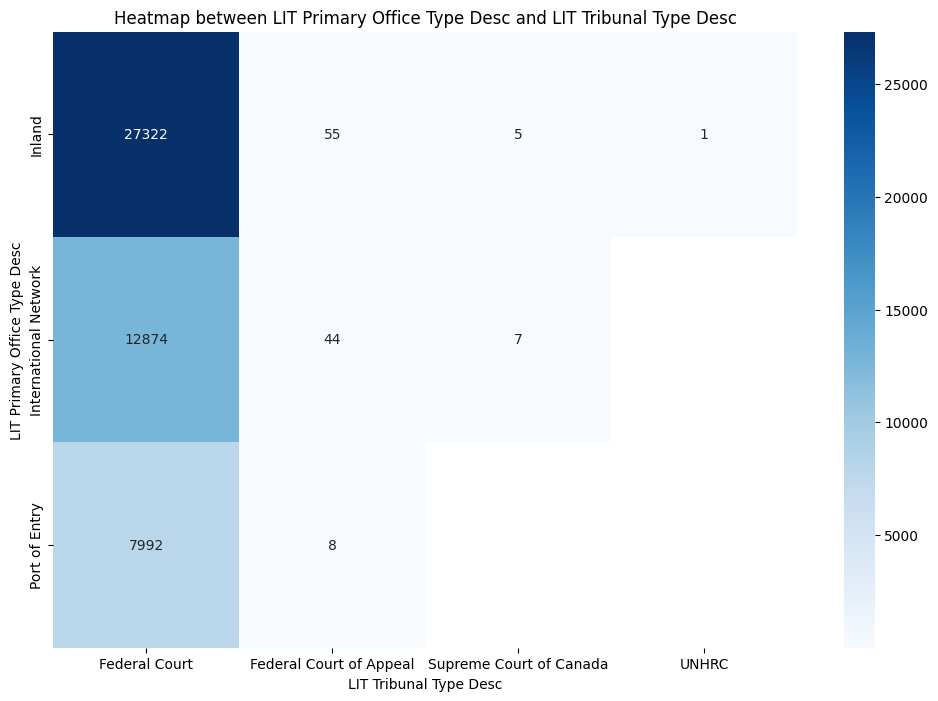

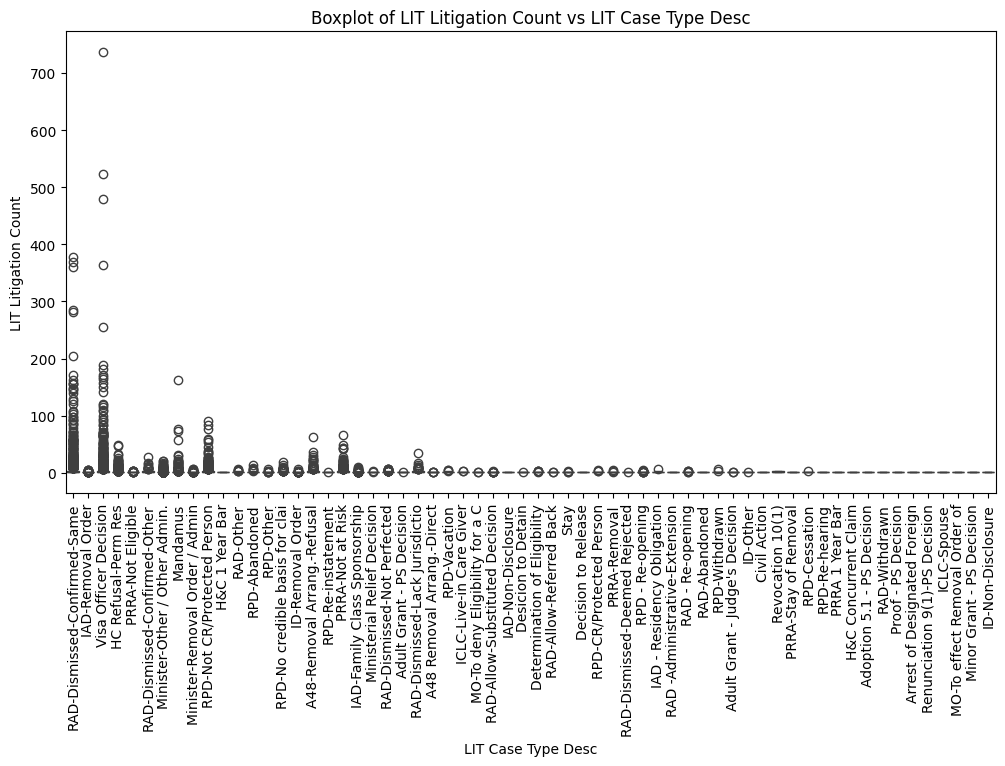

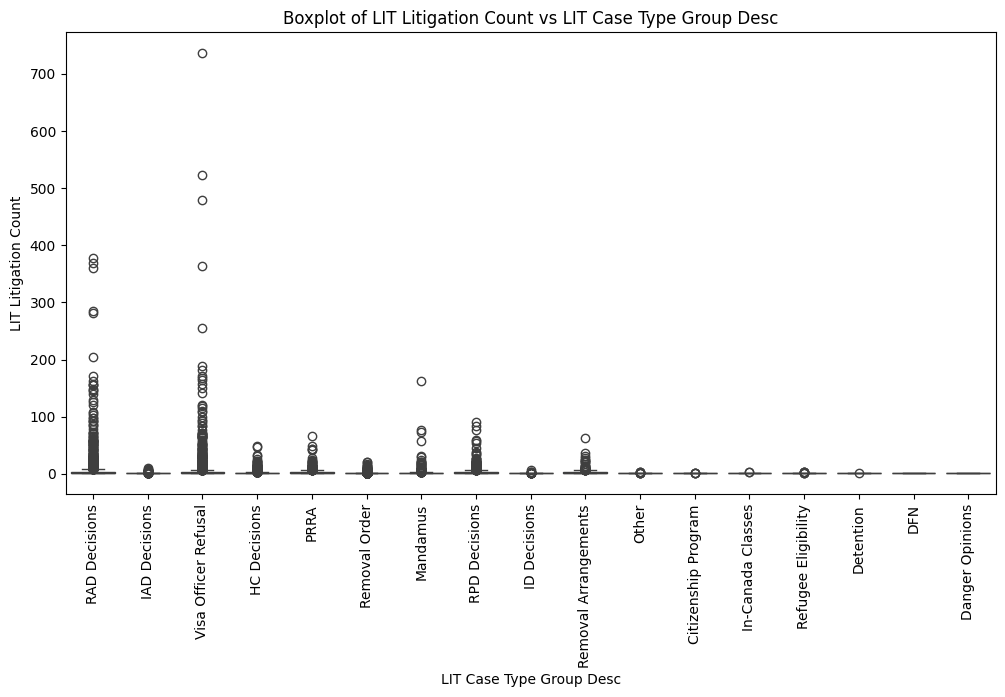

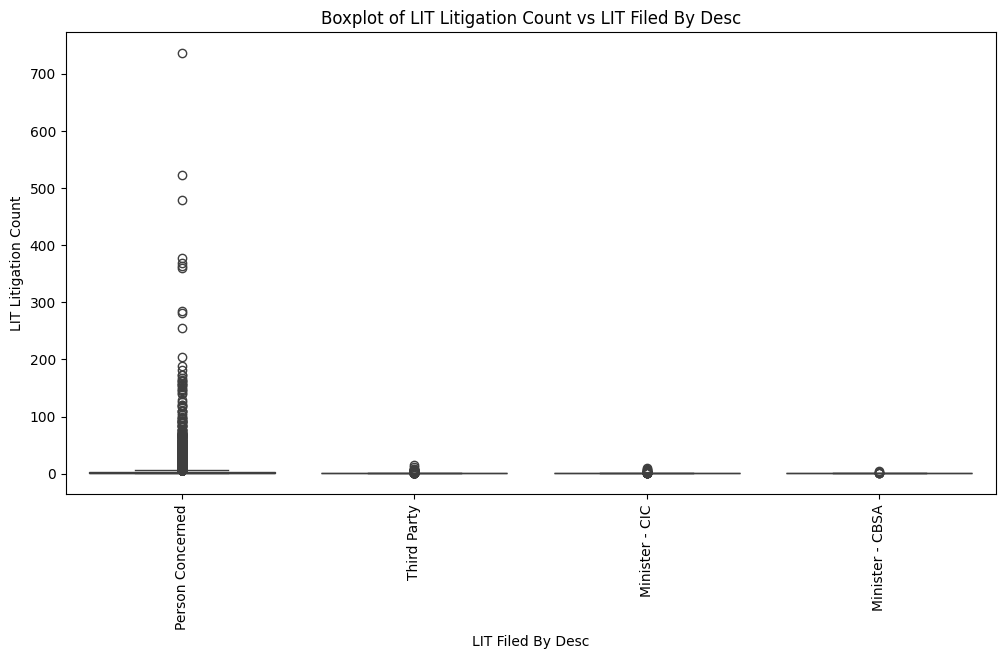

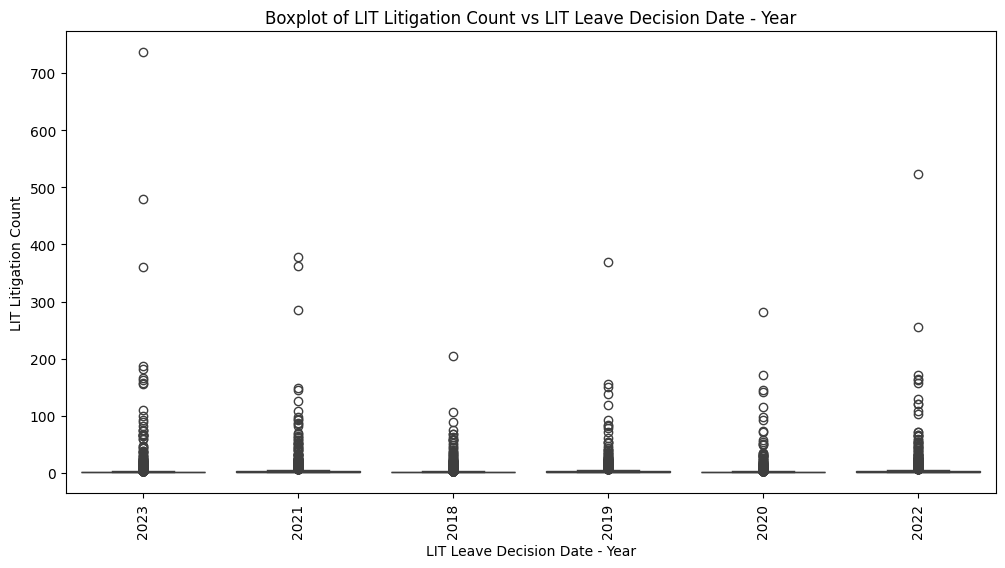

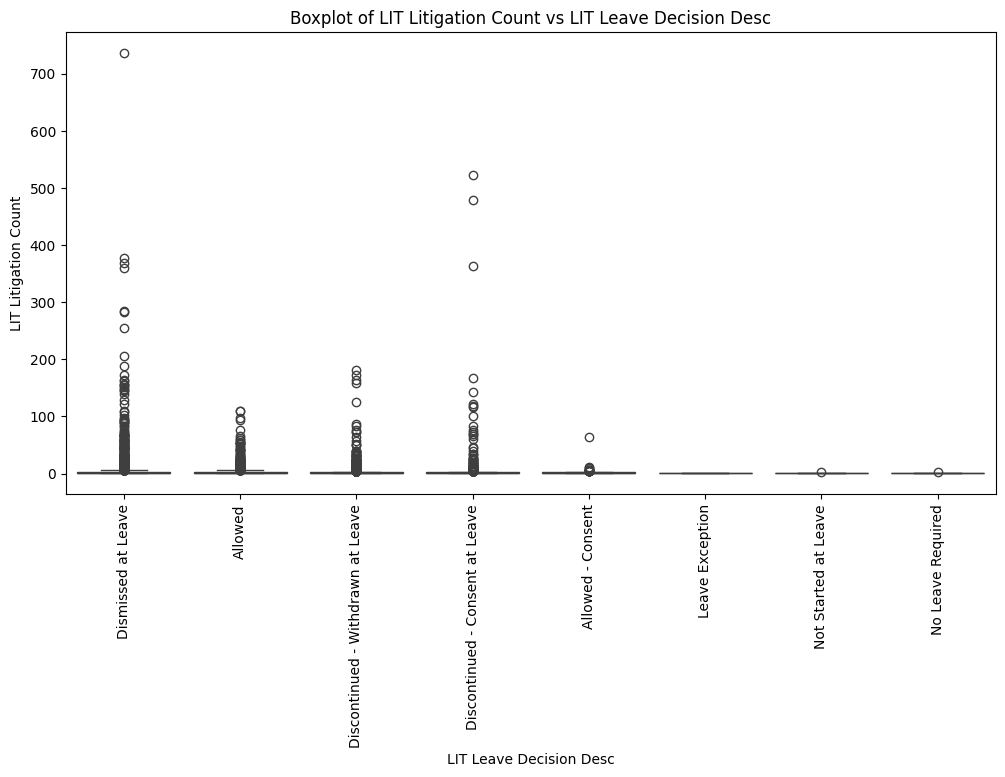

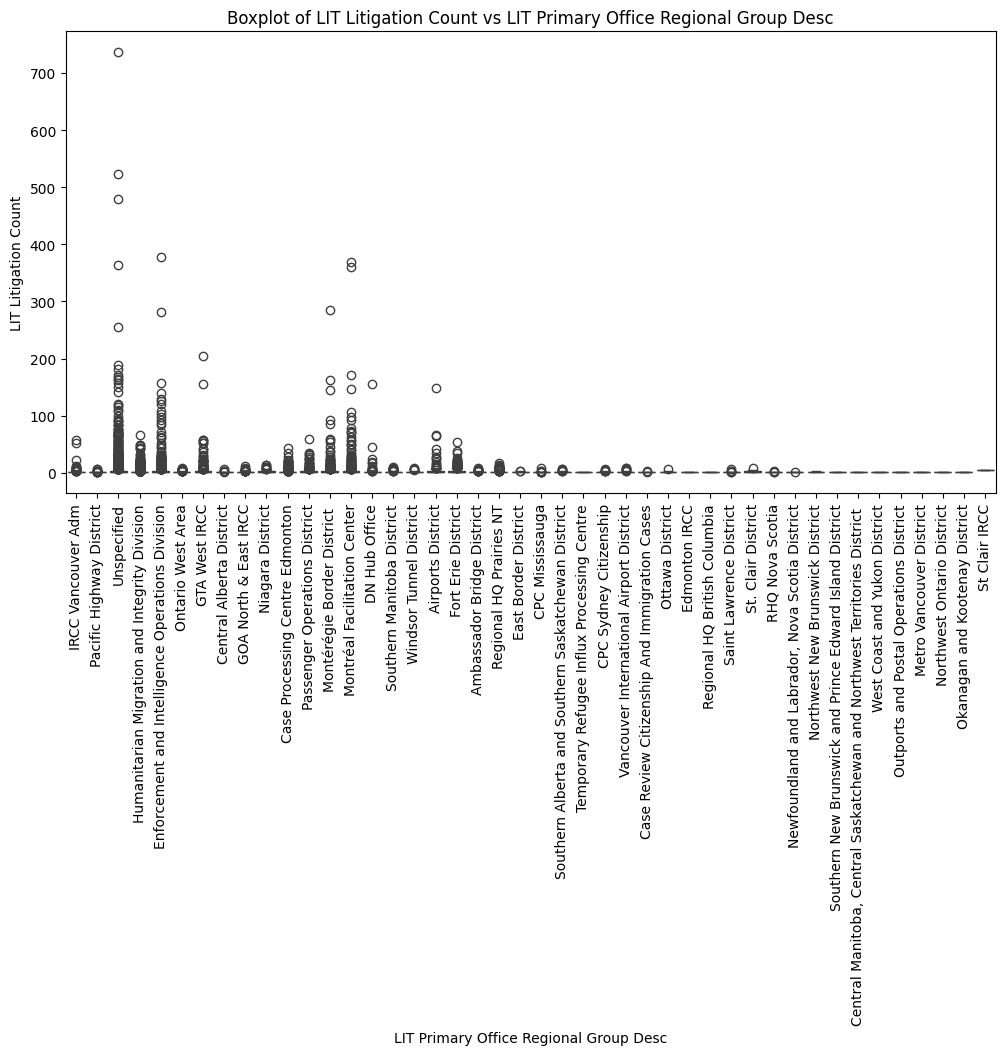

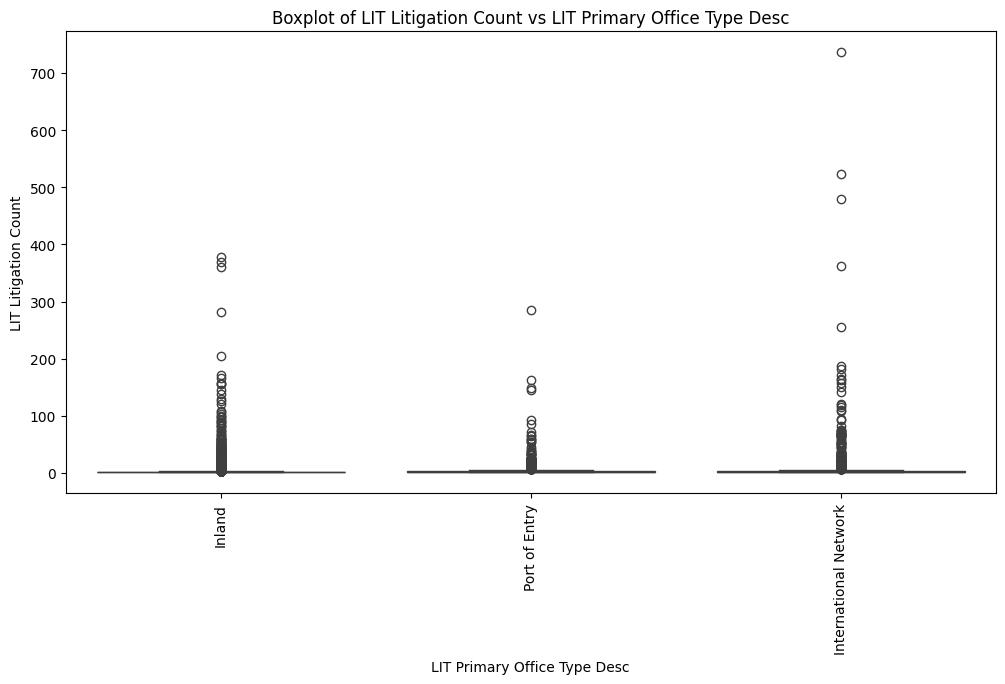

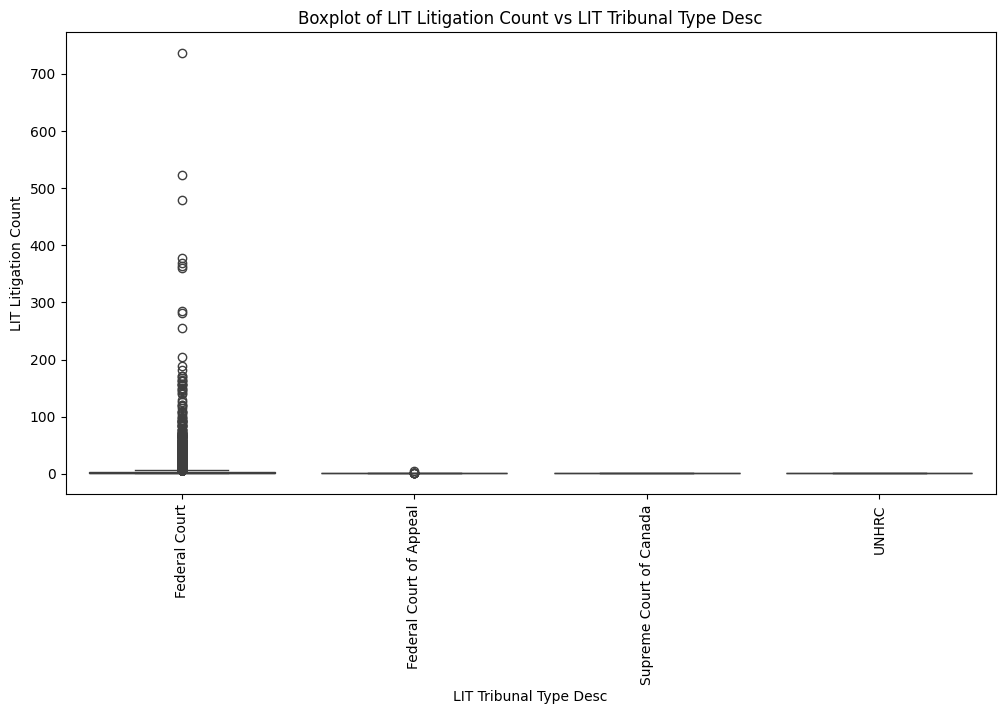

In [10]:
top_categories = df['Country of Citizenship'].value_counts().head(10).index

# 1. Analyze 'Country of Citizenship' with its top 10 values only
country_of_citizenship_data = df[df['Country of Citizenship'].isin(top_categories)]
country_lit_count = country_of_citizenship_data.groupby('Country of Citizenship')['LIT Litigation Count'].sum().loc[top_categories]
plt.figure(figsize=(12, 6))
sns.barplot(x=country_lit_count.index, y=country_lit_count.values)
plt.title('Top 10 Countries of Citizenship (Weighted by LIT Litigation Count)')
plt.xticks(rotation=90)

categorical_columns = df.select_dtypes(include='object').columns.difference(['Country of Citizenship'])

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 < col2:  
            cross_tab = pd.pivot_table(df, values='LIT Litigation Count', index=col1, columns=col2, aggfunc='sum')
            plt.figure(figsize=(12, 8))
            sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.0f')
            plt.title(f"Heatmap between {col1} and {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


# 3. Analyze relationship between categorical features and LIT Litigation Count
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, y="LIT Litigation Count", data=df)
    plt.title(f"Boxplot of LIT Litigation Count vs {column}")
    plt.xticks(rotation=90) 
    plt.show()

## 1. Correlations between the percentage of allowed and case type

In [11]:
df['LIT Leave Decision Desc'] = df['LIT Leave Decision Desc'].replace({
    'Allowed - Consent': 'Allowed',
    'Dismissed at Leave': 'Dismissed'
})

In [12]:
exclude_types = ['RAD Decisions', 'RPD Decisions', 'Refugee Eligibility']
df_excluded = df[~df['LIT Case Type Group Desc'].isin(exclude_types)]

case_type_pivot = df_excluded.pivot_table(
    index='LIT Case Type Group Desc',
    columns='LIT Leave Decision Desc',
    values='LIT Litigation Count',
    aggfunc='sum',
    fill_value=0
)

case_type_pivot = case_type_pivot.assign(
    Allowed=case_type_pivot.get('Allowed', 0),
    Dismissed=case_type_pivot.get('Dismissed', 0)
)

case_type_pivot['Total'] = df_excluded.groupby('LIT Case Type Group Desc')['LIT Litigation Count'].sum()
case_type_pivot['Allowed Percent'] = case_type_pivot['Allowed'] / case_type_pivot['Total'].replace(0, 1)
case_type_pivot['Dismissed Percent'] = case_type_pivot['Dismissed'] / case_type_pivot['Total'].replace(0, 1)

case_type_pivot

LIT Leave Decision Desc   Allowed  Discontinued - Consent at Leave  \
LIT Case Type Group Desc                                             
Citizenship Program             2                                8   
DFN                             0                                0   
Danger Opinions                 0                                0   
Detention                       7                                0   
HC Decisions                  772                              263   
IAD Decisions                 240                               12   
ID Decisions                   85                                1   
In-Canada Classes              12                               17   
Mandamus                       86                               97   
Other                          14                               15   
PRRA                          604                              272   
Removal Arrangements          175                               57   
Removal Order                 497                              469   
Visa Officer Refusal         1536                             4598   

LIT Leave Decision Desc   Discontinued - Withdrawn at Leave  Dismissed  \
LIT Case Type Group Desc                                                 
Citizenship Program                                       0         14   
DFN                                                       0          1   
Danger Opinions                                           0          1   
Detention                                                 9          9   
HC Decisions                                            326       1178   
IAD Decisions                                            40        305   
ID Decisions                                             17        103   
In-Canada Classes                                         6         11   
Mandamus                                               1303        530   
Other                                                    20         50   
PRRA                                                    395       1348   
Removal Arrangements                                    455        837   
Removal Order                                           725       1320   
Visa Officer Refusal                                   3142       4412   

LIT Leave Decision Desc   Leave Exception  No Leave Required  \
LIT Case Type Group Desc                                       
Citizenship Program                     0                  0   
DFN                                     0                  0   
Danger Opinions                         0                  0   
Detention                               0                  0   
HC Decisions                            0                  0   
IAD Decisions                           0                  0   
ID Decisions                            0                  0   
In-Canada Classes                       0                  0   
Mandamus                                0                  0   
Other                                   0                  0   
PRRA                                    1                  0   
Removal Arrangements                    0                  0   
Removal Order                           0                  5   
Visa Officer Refusal                    0                  2   

LIT Leave Decision Desc   Not Started at Leave  Total  Allowed Percent  \
LIT Case Type Group Desc                                                 
Citizenship Program                          0     24         0.083333   
DFN                                          1      2         0.000000   
Danger Opinions                              0      1         0.000000   
Detention                                    0     25         0.280000   
HC Decisions                                 0   2539         0.304057   
IAD Decisions                                0    597         0.402010   
ID Decisions                                 1    207         0.410628   
In-

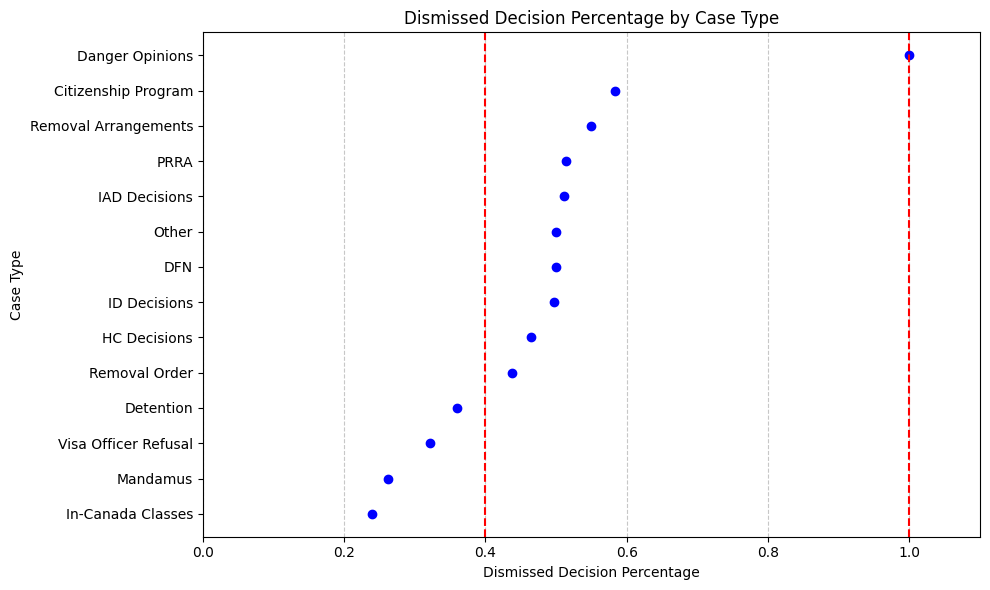

In [32]:
plt.figure(figsize=(10, 6))
sorted_df = case_type_pivot.sort_values('Dismissed Percent')
plt.plot(sorted_df['Dismissed Percent'], sorted_df.index, 'o', color='blue')

plt.xlabel('Dismissed Decision Percentage')
plt.ylabel('Case Type')
plt.title('Dismissed Decision Percentage by Case Type')
plt.axvline(x=1, color='red', linestyle='--', label='20% Threshold')
plt.axvline(x=0.4, color='red', linestyle='--', label='40% Threshold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, sorted_df['Dismissed Percent'].max() + 0.1)

plt.tight_layout()
plt.show()

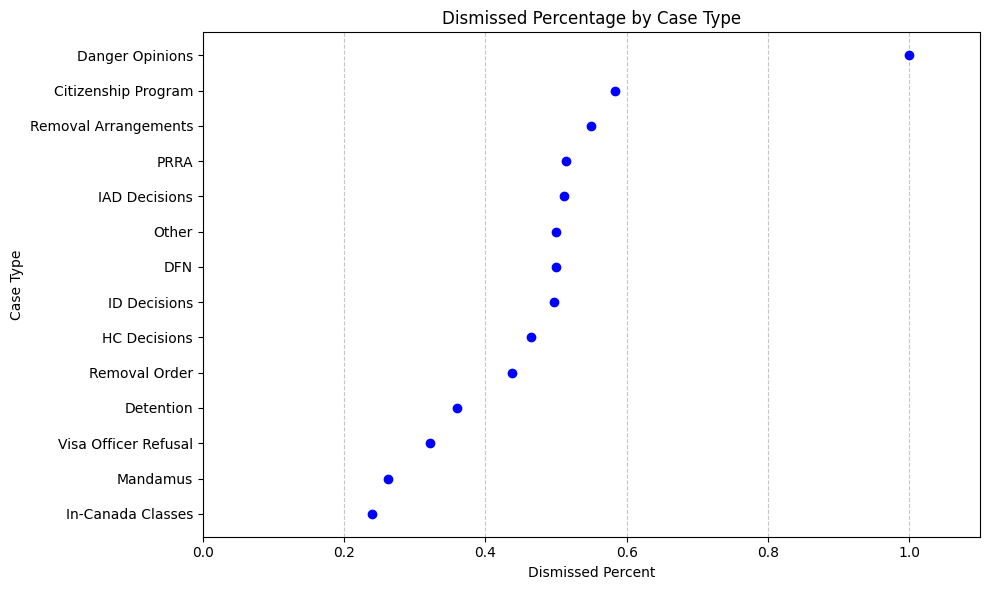

In [14]:
plt.figure(figsize=(10, 6))
sorted_df = case_type_pivot.sort_values('Dismissed Percent')
plt.plot(sorted_df['Dismissed Percent'], sorted_df.index, 'o', color='blue')

plt.xlabel('Dismissed Percent')
plt.ylabel('Case Type')
plt.title('Dismissed Percentage by Case Type')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, sorted_df['Dismissed Percent'].max() + 0.1)

plt.tight_layout()
plt.show()

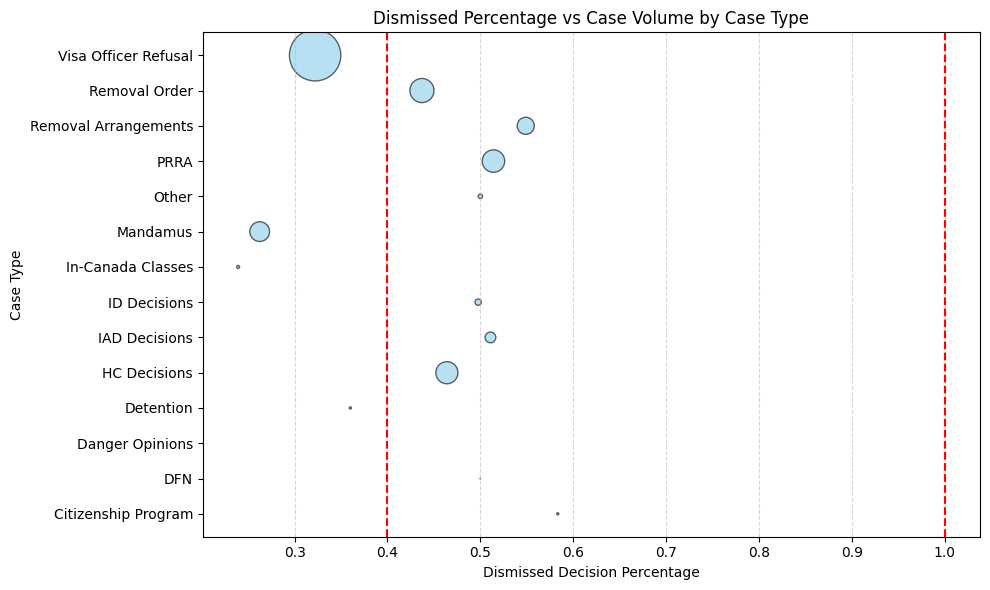

In [35]:
import matplotlib.pyplot as plt

df_bubble = case_type_pivot.copy()
df_bubble = df_bubble[df_bubble['Total'] > 0]  

plt.figure(figsize=(10, 6))

plt.scatter(
    df_bubble['Dismissed Percent'],
    df_bubble.index,
    s=df_bubble['Total'] * 0.1,  
    alpha=0.6,
    color='skyblue',
    edgecolors='black'
)

plt.axvline(x=1, color='red', linestyle='--')
plt.axvline(x=0.4, color='red', linestyle='--')

plt.xlabel('Dismissed Decision Percentage')
plt.ylabel('Case Type')
plt.title('Dismissed Percentage vs Case Volume by Case Type')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2A. Correlations between the percentage of allowed and PRRA

In [16]:
df_prra = df[
    (df['LIT Case Type Group Desc'] == 'PRRA') &
    (df['LIT Leave Decision Desc'].notna()) &
    (df['LIT Litigation Count'].notna())
].copy()

df_prra['LIT Leave Decision Desc'] = df_prra['LIT Leave Decision Desc'].replace({
    'Allowed - Consent': 'Allowed',
    'Dismissed at Leave': 'Dismissed'
})
df_prra

LIT Leave Decision Date - Year        Country of Citizenship  \
5                               2019                       Nigeria   
35                              2021                      Colombia   
46                              2019                       Hungary   
71                              2019               St. Kitts-Nevis   
98                              2022  Federal Republic of Cameroon   
...                              ...                           ...   
13708                           2021                       Romania   
13734                           2018                       Hungary   
13746                           2022                       Eritrea   
13773                           2021                     Swaziland   
13775                           2021                        Mexico   

                 LIT Leave Decision Desc LIT Case Type Group Desc  \
5                              Dismissed                     PRRA   
35                             Dismissed                     PRRA   
46                               Allowed                     PRRA   
71     Discontinued - Withdrawn at Leave                     PRRA   
98                             Dismissed                     PRRA   
...                                  ...                      ...   
13708                          Dismissed                     PRRA   
13734                            Allowed                     PRRA   
13746    Discontinued - Consent at Leave                     PRRA   
13773                          Dismissed                     PRRA   
13775    Discontinued - Consent at Leave                     PRRA   

      LIT Case Type Desc LIT Filed By Desc LIT Tribunal Type Desc  \
5      PRRA-Not Eligible  Person Concerned          Federal Court   
35     PRRA-Not Eligible  Person Concerned          Federal Court   
46     PRRA-Not Eligible  Person Concerned          Federal Court   
71      PRRA-Not at Risk  Person Concerned          Federal Court   
98      PRRA-Not at Risk  Person Concerned          Federal Court   
...                  ...               ...                    ...   
13708   PRRA-Not at Risk  Person Concerned          Federal Court   
13734   PRRA-Not at Risk  Person Concerned          Federal Court   
13746   PRRA-Not at Risk    Minister - CIC          Federal Court   
13773   PRRA-Not at Risk  Person Concerned          Federal Court   
13775   PRRA-Not at Risk  Person Concerned          Federal Court   

      LIT Primary Office Type Desc  \
5                           Inland   
35                          Inland   
46                          Inland   
71                          Inland   
98                          Inland   
...                            ...   
13708                       Inland   
13734                       Inland   
13746                       Inland   
13773                       Inland   
13775                       Inland   

              LIT Primary Office Regional Group Desc  LIT Litigation Count  
5      Humanitarian Migration and Integrity Division                     1  
35     Humanitarian Migration and Integrity Division                     2  
46     Humanitarian Migration and Integrity Division                     1  
71     Humanitarian Migration and Integrity Division                     1  
98     Humanitarian Migration and Integrity Division                     6  
...                                              ...                   ...  
13708  Humanitarian Migration and Integrity Division                     2  
13734  Humanitarian Migration and Integrity Division                     4  
13746  Humanitarian Migration and Integrity Division                     1  
13773  Humanitarian Migration and Integrity Division                     1  
13775  Humanitarian Migration and Integrity Division                     1  

[963 rows x 10 columns]

In [53]:
region_pivot = df_prra.pivot_table(
    index='LIT Primary Office Regional Group Desc',
    columns='LIT Leave Decision Desc',
    values='LIT Litigation Count',
    aggfunc='sum',
    fill_value=0
)

region_pivot['Total'] = region_pivot.sum(axis=1)
region_pivot['Dismissed Percentage'] = region_pivot['Dismissed'] / region_pivot['Total']
region_pivot

LIT Leave Decision Desc                           Allowed  \
LIT Primary Office Regional Group Desc                      
Case Review Citizenship And Immigration Cases           2   
Enforcement and Intelligence Operations Division        0   
GTA West IRCC                                           0   
Humanitarian Migration and Integrity Division         600   
Montréal Facilitation Center                            1   
Montérégie Border District                              1   

LIT Leave Decision Desc                           Discontinued - Consent at Leave  \
LIT Primary Office Regional Group Desc                                              
Case Review Citizenship And Immigration Cases                                   0   
Enforcement and Intelligence Operations Division                                0   
GTA West IRCC                                                                   0   
Humanitarian Migration and Integrity Division                                 272   
Montréal Facilitation Center                                                    0   
Montérégie Border District                                                      0   

LIT Leave Decision Desc                           Discontinued - Withdrawn at Leave  \
LIT Primary Office Regional Group Desc                                                
Case Review Citizenship And Immigration Cases                                     0   
Enforcement and Intelligence Operations Division                                  0   
GTA West IRCC                                                                     0   
Humanitarian Migration and Integrity Division                                   395   
Montréal Facilitation Center                                                      0   
Montérégie Border District                                                        0   

LIT Leave Decision Desc                           Dismissed  Leave Exception  \
LIT Primary Office Regional Group Desc                                         
Case Review Citizenship And Immigration Cases             4                0   
Enforcement and Intelligence Operations Division          1                0   
GTA West IRCC                                             1                0   
Humanitarian Migration and Integrity Division          1342                1   
Montréal Facilitation Center                              0                0   
Montérégie Border District                                0                0   

LIT Leave Decision Desc                           Not Started at Leave  Total  \
LIT Primary Office Regional Group Desc                                          
Case Review Citizenship And Immigration Cases                        0      6   
Enforcement and Intelligence Operations Division                     0      1   
GTA West IRCC                                                        0      1   
Humanitarian Migration and Integrity Division                        2   2612   
Montréal Facilitation Center                                         0      1   
Montérégie Border District                                           0      1   

LIT Leave Decision Desc                           Dismissed Percentage  
LIT Primary Office Regional Group Desc                                  
Case Review Citizenship And Immigration Cases                 0.666667  
Enforcement and Intelligence Operations Division              1.000000  
GTA West IRCC                                                 1.000000  
Humanitarian Migration and Integrity Division                 0.513783  
Montréal Facilitation Center                                  0.000000  
Montérégie Border District                                    0.000000

In [43]:
office_counts = df_prra.pivot_table(
    index='LIT Primary Office Type Desc',
    columns='LIT Leave Decision Desc',
    values='LIT Litigation Count',
    aggfunc='sum',
    fill_value=0
)

office_counts['Total'] = office_counts.sum(axis=1)
office_counts['Dismissed Percent'] = office_counts['Dismissed'] / office_counts['Total'].replace(0, 1)
office_counts

LIT Leave Decision Desc       Allowed  Discontinued - Consent at Leave  \
LIT Primary Office Type Desc                                             
Inland                            603                              272   
Port of Entry                       1                                0   

LIT Leave Decision Desc       Discontinued - Withdrawn at Leave  Dismissed  \
LIT Primary Office Type Desc                                                 
Inland                                                      395       1348   
Port of Entry                                                 0          0   

LIT Leave Decision Desc       Leave Exception  Not Started at Leave  Total  \
LIT Primary Office Type Desc                                                 
Inland                                      1                     2   2621   
Port of Entry                               0                     0      1   

LIT Leave Decision Desc       Dismissed Percent  
LIT Primary Office Type Desc                     
Inland                                 0.514308  
Port of Entry                          0.000000

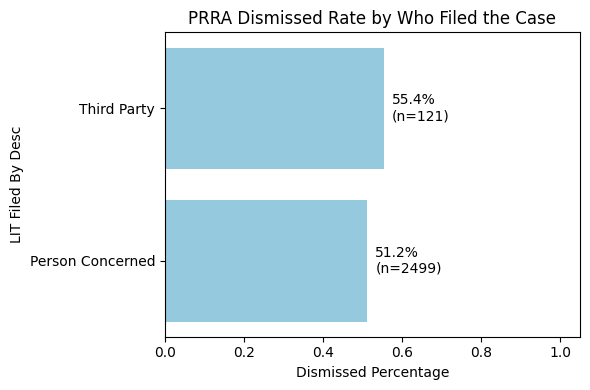

In [56]:
plot_df = df_prra.pivot_table(
    index='LIT Filed By Desc',
    columns='LIT Leave Decision Desc',
    values='LIT Litigation Count',
    aggfunc='sum',
    fill_value=0
)

plot_df['Total'] = plot_df.sum(axis=1)
plot_df['Dismissed Percentage'] = plot_df['Dismissed'] / plot_df['Total']

plot_df = plot_df[plot_df['Total'] > 2].sort_values('Dismissed Percentage', ascending=False)
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x='Dismissed Percentage',
    y=plot_df.index,
    data=plot_df,
    color='skyblue'
)

for i, (percent, total) in enumerate(zip(plot_df['Dismissed Percentage'], plot_df['Total'])):
    ax.text(percent + 0.02, i, f'{percent:.1%}\n(n={int(total)})', va='center')

plt.title('PRRA Dismissed Rate by Who Filed the Case')
plt.xlabel('Dismissed Percentage')
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()

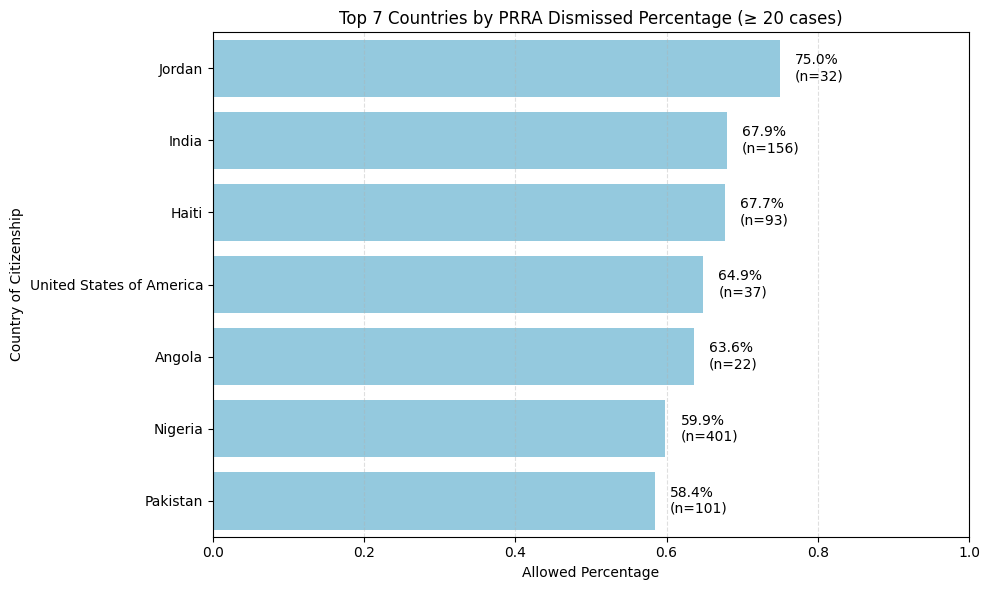

In [57]:
country_counts = df_prra.pivot_table(
    index='Country of Citizenship',
    columns='LIT Leave Decision Desc',
    values='LIT Litigation Count',
    aggfunc='sum',
    fill_value=0
)
country_counts['Total'] = country_counts.sum(axis=1)
country_counts['Dismissed Percentage'] = country_counts['Dismissed'] / country_counts['Total'].replace(0, 1)

country_counts = country_counts[country_counts['Total'] >= 20]

top_allowed = country_counts.sort_values('Dismissed Percentage', ascending=False).head(7)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Dismissed Percentage', y=top_allowed.index, data=top_allowed, color='skyblue')
for i, (percent, total) in enumerate(zip(top_allowed['Dismissed Percentage'], top_allowed['Total'])):
    ax.text(percent + 0.02, i, f'{percent:.1%}\n(n={int(total)})', va='center')

plt.title('Top 7 Countries by PRRA Dismissed Percentage (≥ 20 cases)')
plt.xlabel('Allowed Percentage')
plt.ylabel('Country of Citizenship')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [80]:
selected_countries = ['Jordan', 'India', 'Haiti']
df_prra_selected = df_prra[df_prra['Country of Citizenship'].isin(selected_countries)]
df_prra_selected = df_prra[
    (df_prra['Country of Citizenship'].isin(selected_countries)) &
    (df_prra['LIT Case Type Group Desc'] == 'PRRA')
]
df_prra_selected

LIT Leave Decision Date - Year Country of Citizenship  \
102                             2022                 Jordan   
450                             2019                 Jordan   
556                             2020                  India   
589                             2019                  Haiti   
596                             2018                  Haiti   
689                             2020                 Jordan   
850                             2022                  India   
856                             2019                  India   
1355                            2018                 Jordan   
1639                            2020                  India   
1746                            2020                  Haiti   
2593                            2018                  Haiti   
2742                            2020                  India   
3112                            2021                  India   
3224                            2020                  Haiti   
3246                            2021                  Haiti   
3699                            2019                  Haiti   
3777                            2019                  India   
4795                            2023                  Haiti   
5171                            2023                  Haiti   
5257                            2023                 Jordan   
5511                            2021                  India   
5887                            2018                  India   
6505                            2019                  India   
6965                            2019                  India   
7608                            2023                  India   
7679                            2023                  India   
8008                            2022                  Haiti   
8179                            2022                  India   
8269                            2023                  India   
8366                            2022                 Jordan   
8841                            2023                 Jordan   
8870                            2023                  Haiti   
8994                            2019                  Haiti   
9006                            2021                 Jordan   
9143                            2018                  Haiti   
9189                            2019                  India   
10049                           2019                  Haiti   
10230                           2023                  India   
10436                           2018                  India   
10534                           2021                  Haiti   
10687                           2020                  India   
10786                           2023                  India   
11527                           2019                  India   
11660                           2023                  Haiti   
11917                           2023                  India   
11986                           2019                  India   
12027                           2022                  India   
12554                           2021                  India   
12760                           2022                  Haiti   
13015                           2023                  India   
13220                           2022                  India   
13291                           2020                 Jordan   
13305                           2020                  Haiti   
13576                           2021                 Jordan   

                 LIT Leave Decision Desc LIT Case Type Group Desc  \
102                            Dismissed                     PRRA   
450                            Dismissed                     PRRA   
556      Discontinued - Consent at Leave                     PRRA   
589    Discontinued - Withdrawn at Leave                     PRRA   
596                              Allowed                     PRRA   
689                            Dismissed                     PR

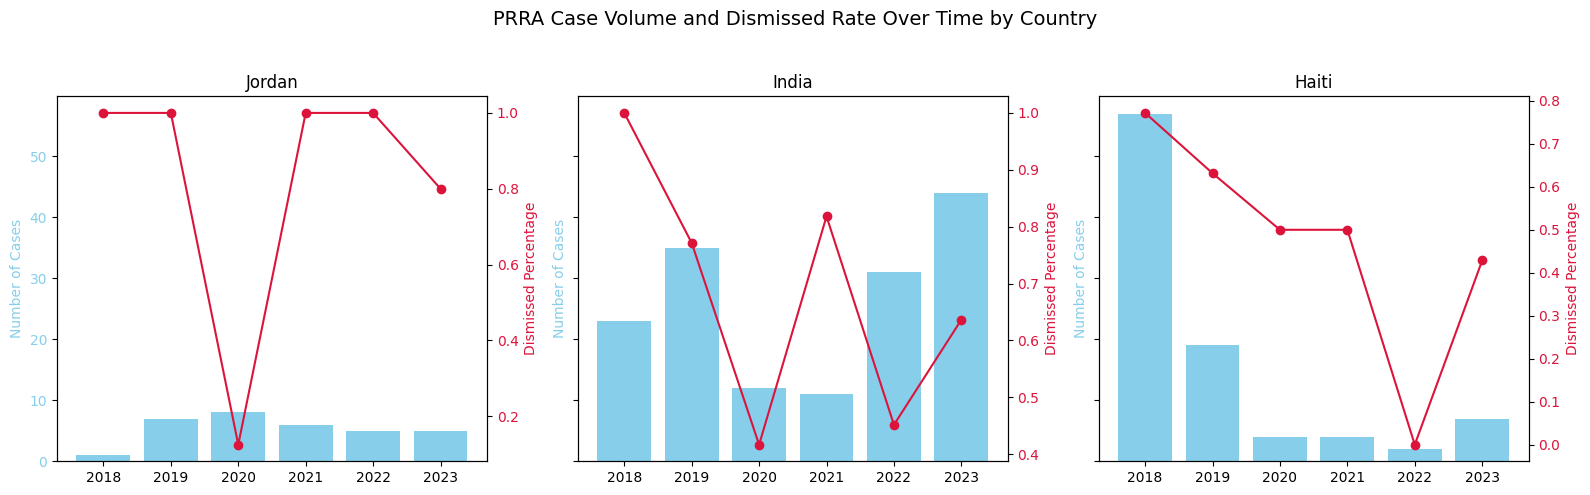

In [82]:
selected_countries = ['Jordan', 'India', 'Haiti']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharex=True, sharey=True)

for i, country in enumerate(selected_countries):
    df_country = df_prra_selected[df_prra_selected['Country of Citizenship'] == country]

    summary = (
        df_country
        .groupby(['LIT Leave Decision Date - Year', 'LIT Leave Decision Desc'])['LIT Litigation Count']
        .sum()
        .unstack(fill_value=0)
        .reset_index()
    )

    summary['Total'] = summary.sum(axis=1, numeric_only=True)
    summary['Dismissed %'] = summary['Dismissed'] / summary['Total']

    ax1 = axes[i]
    ax2 = ax1.twinx()

    ax1.bar(summary['LIT Leave Decision Date - Year'], summary['Total'], color='skyblue', label='Case Volume')
    ax1.set_ylabel('Number of Cases', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    ax2.plot(summary['LIT Leave Decision Date - Year'], summary['Dismissed %'], color='crimson', marker='o', label='Dismissed %')
    ax2.set_ylabel('Dismissed Percentage', color='crimson')
    ax2.tick_params(axis='y', labelcolor='crimson')
    ax1.set_title(country)
plt.xlabel('Year')
plt.suptitle('PRRA Case Volume and Dismissed Rate Over Time by Country', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### 2A. Correlations between the percentage of allowed and HC Decisions

In [24]:
df_hcd = df[
    (df['LIT Case Type Group Desc'] == 'HC Decisions') &
    (df['LIT Leave Decision Desc'].notna()) &
    (df['LIT Litigation Count'].notna())
].copy()

df_hcd['LIT Leave Decision Desc'] = df_hcd['LIT Leave Decision Desc'].replace({
    'Allowed - Consent': 'Allowed',
    'Dismissed at Leave': 'Dismissed'
})
df_hcd

LIT Leave Decision Date - Year           Country of Citizenship  \
3                               2023            Republic of Indonesia   
9                               2021                          Croatia   
15                              2019  Somalia, Democratic Republic of   
17                              2020                          Nigeria   
33                              2020                          Jamaica   
...                              ...                              ...   
13689                           2019                          Belgium   
13699                           2019                       Bangladesh   
13751                           2023                          Ukraine   
13774                           2021                            India   
13779                           2023                           Angola   

                 LIT Leave Decision Desc LIT Case Type Group Desc  \
3        Discontinued - Consent at Leave             HC Decisions   
9                                Allowed             HC Decisions   
15     Discontinued - Withdrawn at Leave             HC Decisions   
17       Discontinued - Consent at Leave             HC Decisions   
33     Discontinued - Withdrawn at Leave             HC Decisions   
...                                  ...                      ...   
13689                          Dismissed             HC Decisions   
13699                          Dismissed             HC Decisions   
13751    Discontinued - Consent at Leave             HC Decisions   
13774    Discontinued - Consent at Leave             HC Decisions   
13779  Discontinued - Withdrawn at Leave             HC Decisions   

        LIT Case Type Desc LIT Filed By Desc LIT Tribunal Type Desc  \
3      HC Refusal-Perm Res  Person Concerned          Federal Court   
9      HC Refusal-Perm Res  Person Concerned          Federal Court   
15     HC Refusal-Perm Res  Person Concerned          Federal Court   
17          H&C 1 Year Bar  Person Concerned          Federal Court   
33     HC Refusal-Perm Res  Person Concerned          Federal Court   
...                    ...               ...                    ...   
13689  HC Refusal-Perm Res  Person Concerned          Federal Court   
13699  HC Refusal-Perm Res       Third Party          Federal Court   
13751  HC Refusal-Perm Res  Person Concerned          Federal Court   
13774  HC Refusal-Perm Res       Third Party          Federal Court   
13779  HC Refusal-Perm Res  Person Concerned          Federal Court   

      LIT Primary Office Type Desc  \
3                           Inland   
9                           Inland   
15                          Inland   
17                          Inland   
33                          Inland   
...                            ...   
13689                       Inland   
13699                       Inland   
13751                       Inland   
13774                       Inland   
13779                       Inland   

              LIT Primary Office Regional Group Desc  LIT Litigation Count  
3      Humanitarian Migration and Integrity Division                     2  
9      Humanitarian Migration and Integrity Division                     2  
15     Humanitarian Migration and Integrity Division                     1  
17     Humanitarian Migration and Integrity Division                     1  
33     Humanitarian Migration and Integrity Division                     3  
...                                              ...                   ...  
13689  Humanitarian Migration and Integrity Division                     1  
13699  Humanitarian Migration and Integrity Division                     1  
13751  Humanitarian Migration and Integrity Division                     1  
13774  Humanitarian Migration and Integrity Division                     4  
13779  Humanitarian Migration and Integrity Division                     1  

[1091 rows x 10 columns]

In [75]:
office_counts = df_hcd.pivot_table(
    index='LIT Primary Office Type Desc',
    columns='LIT Leave Decision Desc',
    values='LIT Litigation Count',
    aggfunc='sum',
    fill_value=0
)

office_counts['Total'] = office_counts.sum(axis=1)
office_counts['Dismissed Percentage'] = office_counts['Dismissed'] / office_counts['Total'].replace(0, 1)
office_counts

LIT Leave Decision Desc       Allowed  Discontinued - Consent at Leave  \
LIT Primary Office Type Desc                                             
Inland                            770                              257   
International Network               2                                6   

LIT Leave Decision Desc       Discontinued - Withdrawn at Leave  Dismissed  \
LIT Primary Office Type Desc                                                 
Inland                                                      324       1176   
International Network                                         2          2   

LIT Leave Decision Desc       Total  Dismissed Percentage  
LIT Primary Office Type Desc                               
Inland                         2527              0.465374  
International Network            12              0.166667

In [76]:
region_pivot_2 = df_hcd.pivot_table(
    index='LIT Primary Office Regional Group Desc',
    columns='LIT Leave Decision Desc',
    values='LIT Litigation Count',
    aggfunc='sum',
    fill_value=0
)

region_pivot_2['Total'] = region_pivot_2.sum(axis=1)
region_pivot_2['Dismissed Percentage'] = region_pivot_2['Dismissed'] / region_pivot_2['Total'].replace(0, 1)

region_pivot_2 = region_pivot_2[
    (region_pivot_2['Dismissed Percentage'] > 0) & 
    (region_pivot_2['Total'] >= 2)
]

region_pivot_2 = region_pivot_2.sort_values('Dismissed Percentage', ascending=False)
region_pivot_2


LIT Leave Decision Desc                        Allowed  \
LIT Primary Office Regional Group Desc                   
Case Processing Centre Edmonton                      0   
GTA West IRCC                                        2   
Humanitarian Migration and Integrity Division      766   
Ontario West Area                                    0   
Regional HQ Prairies NT                              0   
CPC Mississauga                                      1   
Unspecified                                          2   

LIT Leave Decision Desc                        Discontinued - Consent at Leave  \
LIT Primary Office Regional Group Desc                                           
Case Processing Centre Edmonton                                              0   
GTA West IRCC                                                                2   
Humanitarian Migration and Integrity Division                              247   
Ontario West Area                                                            1   
Regional HQ Prairies NT                                                      2   
CPC Mississauga                                                              0   
Unspecified                                                                  8   

LIT Leave Decision Desc                        Discontinued - Withdrawn at Leave  \
LIT Primary Office Regional Group Desc                                             
Case Processing Centre Edmonton                                                2   
GTA West IRCC                                                                  1   
Humanitarian Migration and Integrity Division                                314   
Ontario West Area                                                              1   
Regional HQ Prairies NT                                                        0   
CPC Mississauga                                                                2   
Unspecified                                                                    3   

LIT Leave Decision Desc                        Dismissed  Total  \
LIT Primary Office Regional Group Desc                            
Case Processing Centre Edmonton                        3      5   
GTA West IRCC                                          6     11   
Humanitarian Migration and Integrity Division       1160   2487   
Ontario West Area                                      1      3   
Regional HQ Prairies NT                                1      3   
CPC Mississauga                                        1      4   
Unspecified                                            4     17   

LIT Leave Decision Desc                        Dismissed Percentage  
LIT Primary Office Regional Group Desc                               
Case Processing Centre Edmonton                            0.600000  
GTA West IRCC                                              0.545455  
Humanitarian Migration and Integrity Division              0.466425  
Ontario West Area                                          0.333333  
Regional HQ Prairies NT                                    0.333333  
CPC Mississauga                                            0.250000  
Unspecified                                                0.235294

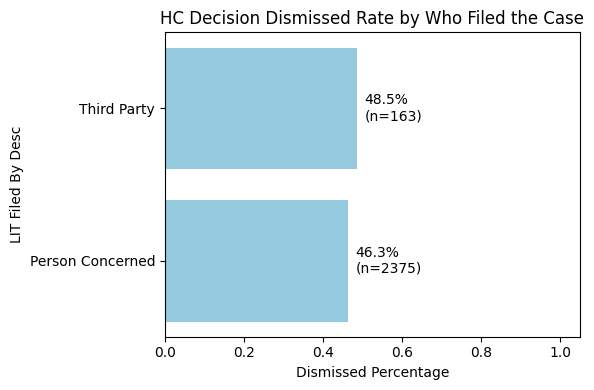

In [88]:
plot_df = df_hcd.pivot_table(
    index='LIT Filed By Desc',
    columns='LIT Leave Decision Desc',
    values='LIT Litigation Count',
    aggfunc='sum',
    fill_value=0
)

plot_df['Total'] = plot_df.sum(axis=1)
plot_df['Dismissed Percentage'] = plot_df['Dismissed'] / plot_df['Total']

plot_df = plot_df[plot_df['Total'] > 2].sort_values('Dismissed Percentage', ascending=False)
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x='Dismissed Percentage',
    y=plot_df.index,
    data=plot_df,
    color='skyblue'
)

for i, (percent, total) in enumerate(zip(plot_df['Dismissed Percentage'], plot_df['Total'])):
    ax.text(percent + 0.02, i, f'{percent:.1%}\n(n={int(total)})', va='center')

plt.title('HC Decision Dismissed Rate by Who Filed the Case')
plt.xlabel('Dismissed Percentage')
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()


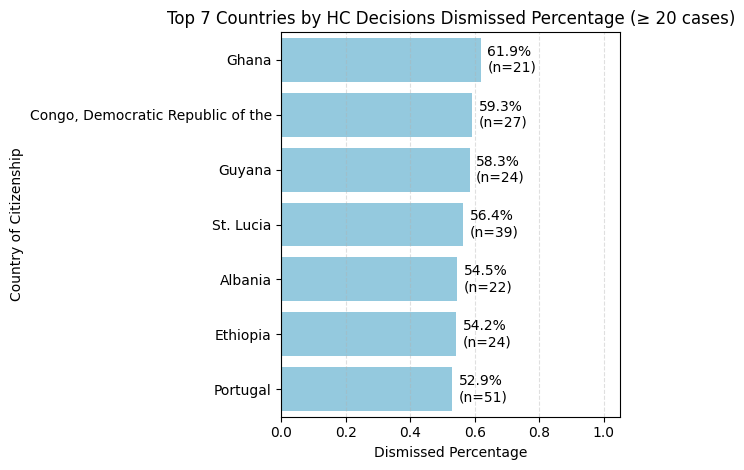

In [79]:
country_counts_2 = df_hcd.pivot_table(
    index='Country of Citizenship',
    columns='LIT Leave Decision Desc',
    values='LIT Litigation Count',
    aggfunc='sum',
    fill_value=0
)

country_counts_2['Total'] = country_counts_2.sum(axis=1)
country_counts_2['Dismissed Percentage'] = country_counts_2['Dismissed'] / country_counts_2['Total'].replace(0, 1)

country_counts_2 = country_counts_2[country_counts_2['Total'] >= 20]

top_allowed_2 = country_counts_2.sort_values('Dismissed Percentage', ascending=False).head(7)
ax = sns.barplot(x='Dismissed Percentage', y=top_allowed_2.index, data=top_allowed_2, color='skyblue')
for i, (percent, total) in enumerate(zip(top_allowed_2['Dismissed Percentage'], top_allowed_2['Total'])):
    ax.text(percent + 0.02, i, f'{percent:.1%}\n(n={int(total)})', va='center')
plt.title('Top 7 Countries by HC Decisions Dismissed Percentage (≥ 20 cases)')
plt.xlabel('Dismissed Percentage')
plt.ylabel('Country of Citizenship')
plt.xlim(0, 1.05)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


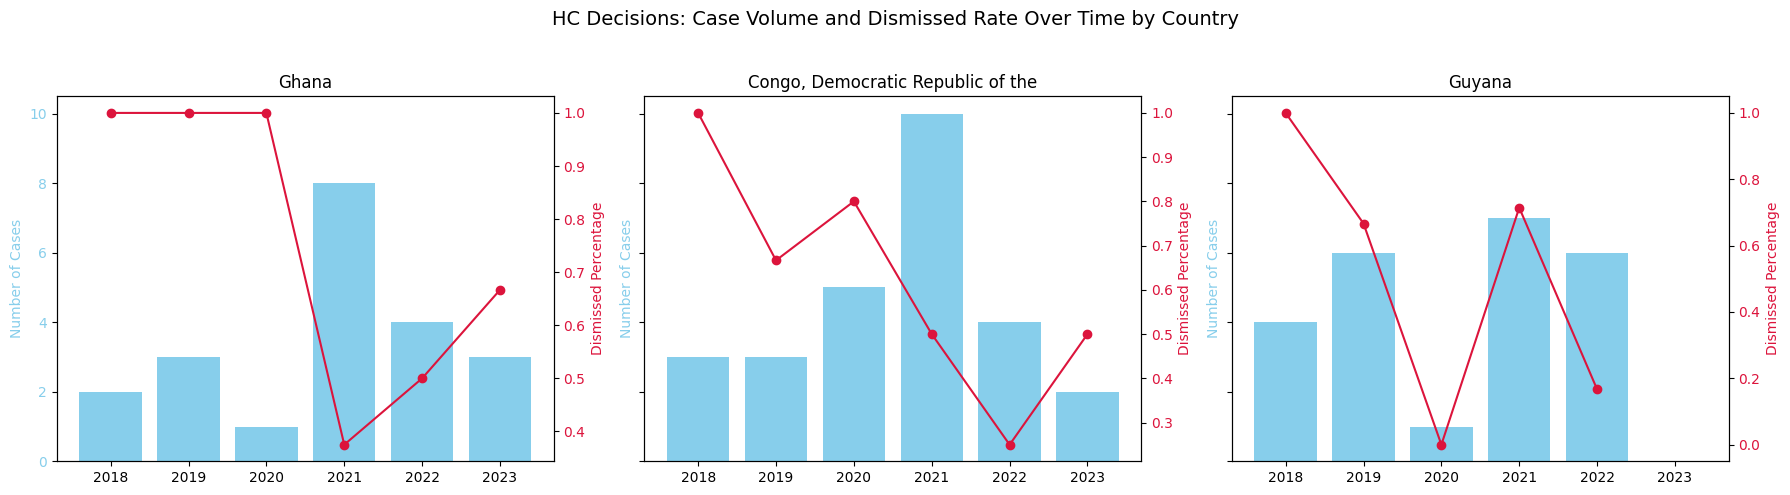

In [87]:
selected_countries_hc = ['Ghana', 'Congo, Democratic Republic of the', 'Guyana']

df_hc_selected = df_hcd[
    (df_hcd['Country of Citizenship'].isin(selected_countries_hc)) &
    (df_hcd['LIT Case Type Group Desc'] == 'HC Decisions')
].copy()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharex=True, sharey=True)

for i, country in enumerate(selected_countries_hc):
    df_country = df_hc_selected[df_hc_selected['Country of Citizenship'] == country]
    summary = (
        df_country
        .groupby(['LIT Leave Decision Date - Year', 'LIT Leave Decision Desc'])['LIT Litigation Count']
        .sum()
        .unstack(fill_value=0)
        .reset_index()
    )

    summary['Dismissed'] = summary.get('Dismissed', 0)

    summary['Total'] = summary.loc[:, summary.columns.difference(['LIT Leave Decision Date - Year'])].sum(axis=1)
    summary['Dismissed %'] = summary['Dismissed'] / summary['Total'].replace(0, 1)

    ax1 = axes[i]
    ax2 = ax1.twinx()

    ax1.bar(summary['LIT Leave Decision Date - Year'], summary['Total'], color='skyblue')
    ax1.set_ylabel('Number of Cases', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    ax2.plot(summary['LIT Leave Decision Date - Year'], summary['Dismissed %'], color='crimson', marker='o')
    ax2.set_ylabel('Dismissed Percentage', color='crimson')
    ax2.tick_params(axis='y', labelcolor='crimson')
    ax1.set_title(country)

plt.xlabel('Year')
plt.suptitle('HC Decisions: Case Volume and Dismissed Rate Over Time by Country', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



### 2. Correlations between the percentage of allowed and office type

In [ ]:
exclude_types = ['RAD Decisions', 'RPD Decisions', 'Refugee Eligibility']
df_office = df[~df['LIT Case Type Group Desc'].isin(exclude_types)]

office_type_pivot = df_office.pivot_table(
    index='LIT Primary Office Type Desc',
    columns='LIT Leave Decision Desc',
    values='LIT Litigation Count',
    aggfunc='sum',
    fill_value=0
)

office_type_pivot = office_type_pivot.assign(
    Allowed=office_type_pivot.get('Allowed', 0),
    Dismissed=office_type_pivot.get('Dismissed', 0)
)

total_by_office = df_office.groupby('LIT Primary Office Type Desc')['LIT Litigation Count'].sum()
office_type_pivot['Total'] = total_by_office

office_type_pivot['Allowed Percent'] = office_type_pivot['Allowed'] / office_type_pivot['Total'].replace(0, 1)
office_type_pivot['Dismissed Percent'] = office_type_pivot['Dismissed'] / office_type_pivot['Total'].replace(0, 1)

office_type_pivot

In [ ]:
plt.figure(figsize=(8, 5))

sorted_office = office_type_pivot.sort_values('Allowed Percent')
sizes = sorted_office['Total'] / 18

plt.scatter(
    x=sorted_office['Allowed Percent'],
    y=sorted_office.index,
    s=sizes,  # bubble size
    color='skyblue',
    alpha=0.5,
    edgecolor='black'
)

plt.xlabel('Allowed Decision Percentage')
plt.ylabel('Office Type')
plt.title('Allowed Percentage vs Volume by Office Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, sorted_office['Allowed Percent'].max() + 0.1)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sorted_office = office_type_pivot.sort_values('Dismissed Percent')
plt.plot(sorted_office['Dismissed Percent'], sorted_office.index, 'o', color='blue')

plt.xlabel('Dismissed Decision Percentage')
plt.ylabel('Office Type')
plt.title('Dismissed Decision Percentage by Office Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, sorted_office['Dismissed Percent'].max() + 0.1)
plt.tight_layout()
plt.show()